<a href="https://colab.research.google.com/github/harrislam1/2018-2020_Toronto_Parking_Infraction_Analysis/blob/main/2018_2020_Toronto_parking_infraction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2018-2020 Toronto Parking Infraction Data Analysis 
 

Below is a notebook that uses the following data sources for the analysis:



*   [Parking Tickets](https://open.toronto.ca/dataset/parking-tickets/)
*   [Green P Parking](https://open.toronto.ca/dataset/parking-tickets/)
*   [TTC Routes and Schedules](https://open.toronto.ca/dataset/parking-tickets/)
*  [Toronto Demographics](https://open.toronto.ca/dataset/wellbeing-toronto-demographics-nhs-indicators/)
* [City Wards](https://open.toronto.ca/dataset/wellbeing-toronto-demographics-nhs-indicators/)
* [Demographic Data](https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/wellbeing-toronto/wellbeing-toronto-guide/)




## Summary of Findings

Feature | 2018 | 2019 | 2020
---|---|---|---|
Total Number of Infractions | 2,044,288 | 2,213,939| 1,403,663
Total Amount of Fines (CAD) | 100,198,155 |108,416,630 | 70,550,280 
Most Common Infraction Codes |5, 3, 403, 29, 207  |5, 3, 403, 207, 29 | 5, 3, 9, 207, 29
Location with highest total fine amount | 40 Orchard Blvd |555 Rexdale Blvd |1 Brimley Rd
Location with highest number of fines issued  | 20 Edward St | 4700 Keele St | 4001 Leslie St
Days of the week where most fines were issued |Tues-Thurs|Tues & Fri| Tues-Wed
Season where most fines are issued|Fall|Fall|Fall & Winter
Month where most fines were issued|March & October|July & October|January & September

**Demographic insights:**

The areas that incurred the most parking infractions stayed consistent between 2018-2020. The only difference is that since 2020 was a special year(beginning of COVID19 pandemic), the amount of parking infractions was reduced by about 30%(compared to 2019) but the location of the areas of infraction stayed about the same. In other words, the same areas had the top 20 infraction counts from 2018-2020, it's just that there were less parking infractions handed out in 2020 due to people staying at home for to the pandemic lockdown. 

The following Toronto areas are high infraction locations and have a higher percentage of people with either high school diplomas (or equivalent) or no diplomas: 


* Scarborough Village (69% visible minority, 29% not a visible minority) 

* Etobicoke West Mall (39% visible minority, 57% not a visible minority)  

* Rexdale Kipling (42% visible minority, 55% not a visible minority )

The following Toronto areas are high infraction locations and have a higher percentage of people with either post secondary education(Bachelors, Masters, PhDs) or apprenticeships certifications: 

* Bayview Village (60% visible minority, 38% not a visible minority)  
*  Niagara (30% visible minority, 69% not a visible minority)
*  Waterfront Communities - The Island (40% visible minority, 59% not a visible minority)


Below are the graphs:




In [ ]:
!pip install geopandas

In [2]:
#libraries used in this notebook
import pandas as pd
import collections
import matplotlib.pyplot as plt
import requests
from geopy.geocoders import Nominatim
from geopy.distance import geodesic,distance
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px
import datetime as dt
import geopandas as gpd

The order of the data graphs are shown backwards below: 2020, 2019, 2018.

## 2020 Data

In [17]:
#load parking tag files for 2020
parking_tags_data2020=[pd.read_csv("/content/Parking_Tags_Data_2020.00"+f"{i}"+".csv") for i in range(6)]
parking_tags_data2020=pd.concat(parking_tags_data2020)
parking_tags_data2020[parking_tags_data2020['location2'].isna()].shape


(119, 11)

In [18]:
parking_tags_data2020.shape

(1403663, 11)

In [19]:
parking_tags_data2020.duplicated().sum()

0

In [20]:
parking_tags_data2020.tag_number_masked.nunique()

100000

In [ ]:
parking_tags_data2020.describe()

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction
count,1.403544e+06,1.403544e+06,1.403544e+06,1.402267e+06
mean,2.020068e+07,7.728207e+01,5.026581e+01,1.136766e+03
std,3.844412e+02,1.212255e+02,4.779978e+01,6.020715e+02
min,2.020010e+07,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.020023e+07,3.000000e+00,3.000000e+01,7.320000e+02
50%,2.020081e+07,8.000000e+00,3.000000e+01,1.200000e+03
75%,2.020102e+07,2.070000e+02,5.000000e+01,1.604000e+03
max,2.020123e+07,4.350000e+02,4.500000e+02,3.200000e+03


In [ ]:
parking_tags_data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403544 entries, 0 to 153662
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   tag_number_masked       1403544 non-null  object 
 1   date_of_infraction      1403544 non-null  int64  
 2   infraction_code         1403544 non-null  int64  
 3   infraction_description  1403544 non-null  object 
 4   set_fine_amount         1403544 non-null  int64  
 5   time_of_infraction      1402267 non-null  float64
 6   location1               1226999 non-null  object 
 7   location2               1403544 non-null  object 
 8   location3               99349 non-null    object 
 9   location4               99736 non-null    object 
 10  province                1403544 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 128.5+ MB


In [ ]:
parking_tags_data2020.isna().sum()

tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction           1277
location1                  176545
location2                       0
location3                 1304195
location4                 1303808
province                        0
dtype: int64

In [ ]:
parking_tags_data2020.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code             int64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [ ]:
#percentage of null location values for 2020
parking_tags_data2020[parking_tags_data2020['location2'].isna()].shape[0]/parking_tags_data2020.shape[0]

8.477818393731259e-05

In [ ]:
#ignoring non null location2 values since it's only small percentage
parking_tags_data2020=parking_tags_data2020[parking_tags_data2020['location2'].notna()]

After exploring the 2020 data(1304399 rows and 11 columns) with a few python functions, the conclusions I arrived to are:


1.   There are *no* null values in the **infraction_code**, **set_fine_amount**, and **date_of_infraction** columns.
2.   **location2** provides the actual physical address of where the infraction took place. So this field will be used to determine frequency of locations.
3. 0.09% of **time_of_infraction** values are null.
4. There are no duplicate values and each row in the excel sheet represents an infraction issued out at a point in time.
5. The **tag_number_masked** column potentially represents a unique identifier that links to a specific vehicle. One could get a list of frequent infractionists and determine where these infractionists tend to receive their infractions. This could be future work.




<BarContainer object of 20 artists>

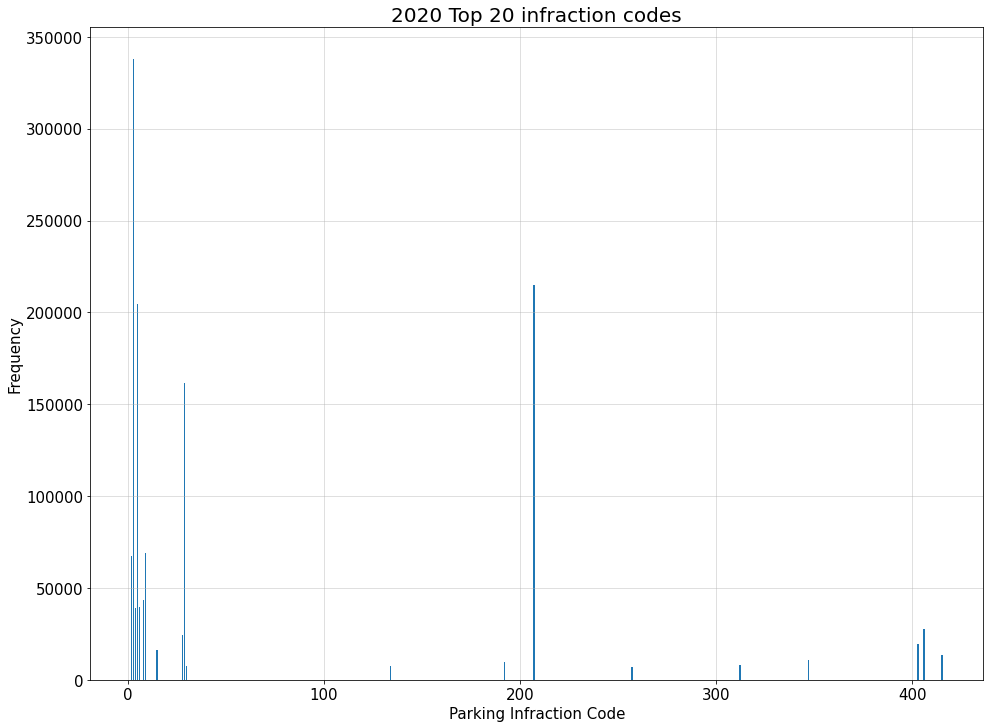

In [ ]:
plt.figure(figsize=(16,12)) 
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('2020 Top 20 infraction codes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.bar(*zip(*collections.Counter(parking_tags_data2020.infraction_code).most_common(20)))

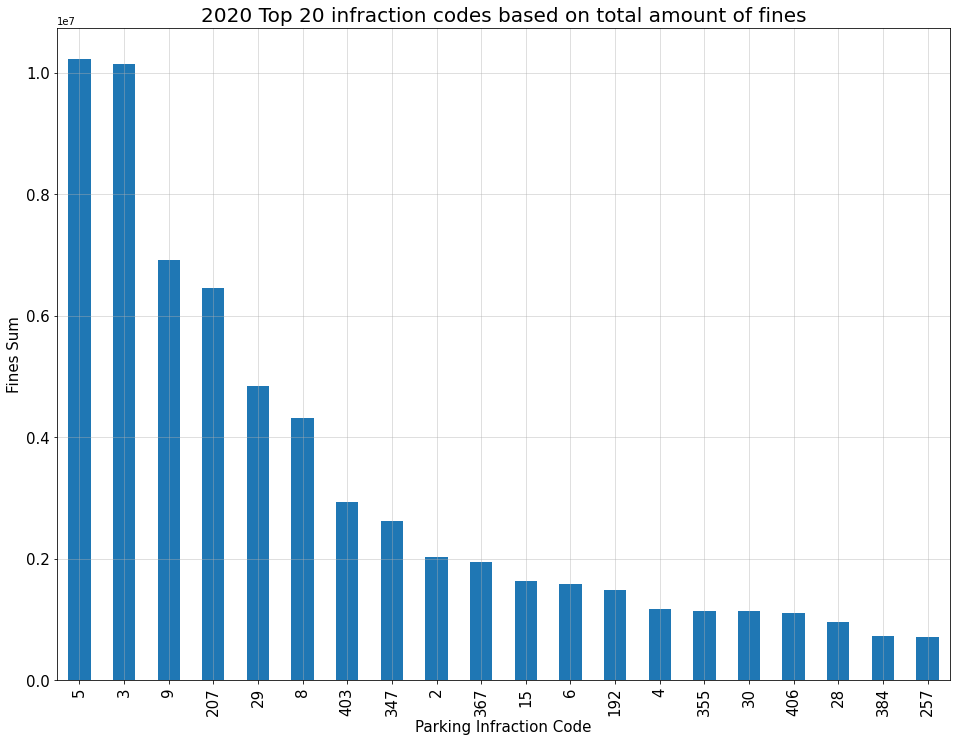

In [ ]:
plt.figure(figsize=(16,12)) 
parking_tags_data2020.groupby(['infraction_code']).set_fine_amount.sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Fines Sum',fontsize=15)
plt.title('2020 Top 20 infraction codes based on total amount of fines', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)


Infraction codes meaning:

5 = PARK-SIGNED HWY-PROHIBIT DY/TM

3 = PARKING ON PRIVATE PROPERTY

9 = STOP-SIGNED HWY-PROHIBIT TM/DY

207 = PARK MACHINE-REQD FEE NOT PAID	

29 = PARK PROHIBITED TIME NO PERMIT

8 = STAND VEH.-PROHIBIT TIME/DAY	

403 = STOP-SIGNED HIGHWAY-RUSH HOUR

347 = PARK IN A FIRE ROUTE

2 = PARK - LONGER THAN 3 HOURS

367 = STND ONSTRT ACCESSIBLE NO PRMT

15 = PARK-WITHIN 3M OF FIRE HYDRANT

6 = PARK-SIGNED HWY-EXC PERMT TIME

192 = STAND SIGNED TRANSIT STOP

4 = PARK ON MUNICIPAL PROPERTY	

355 = PARK IN ACCESSIBLE NO PERMIT

30 = STOP-(ON/OVER) (SIDEWK/FTPATH)

406 = PARK-VEH. W/O VALID ONT PLATE	

28 = PARK-N.YORK 2AM-6AM DEC1-MAR31

384 = STOP VEH OTR THN BCYCL-BYCL LN

257 = PARK CONTRARY POSTED CONDITION	

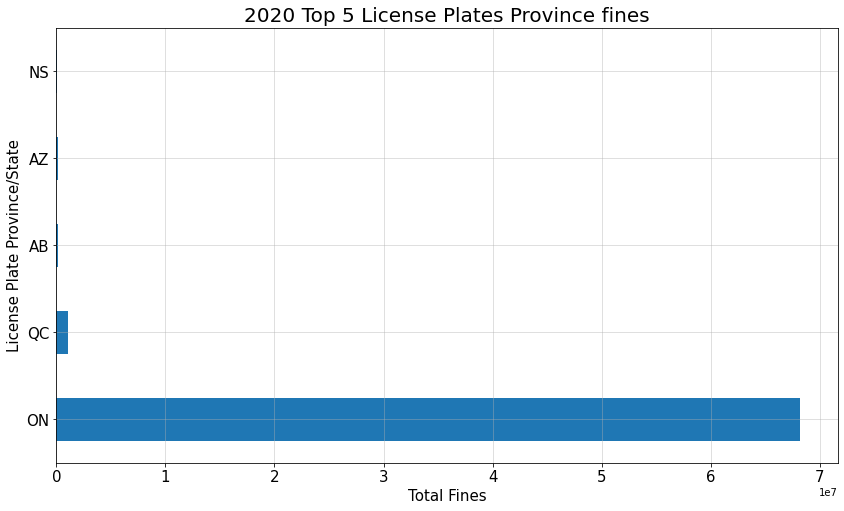

In [ ]:
plt.figure(figsize=(14,8)) 
parking_tags_data2020.groupby(['province']).set_fine_amount.sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.xlabel('Total Fines',fontsize=15)
plt.ylabel('License Plate Province/State',fontsize=15)
plt.title('2020 Top 5 License Plates Province fines', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)


Arizona surprisingly made the top 5. Arizona licesne plates were fined more than Nova Scotia license plates.

In [ ]:
parking_tags_data2020.loc[parking_tags_data2020['infraction_code']==257]

In [ ]:
#total fines collected in 2020
parking_tags_data2020.set_fine_amount.sum()

70550280

A total of 70,550,280 CAD worth of fines were handed out in 2020 in the Greater Toronto Area.

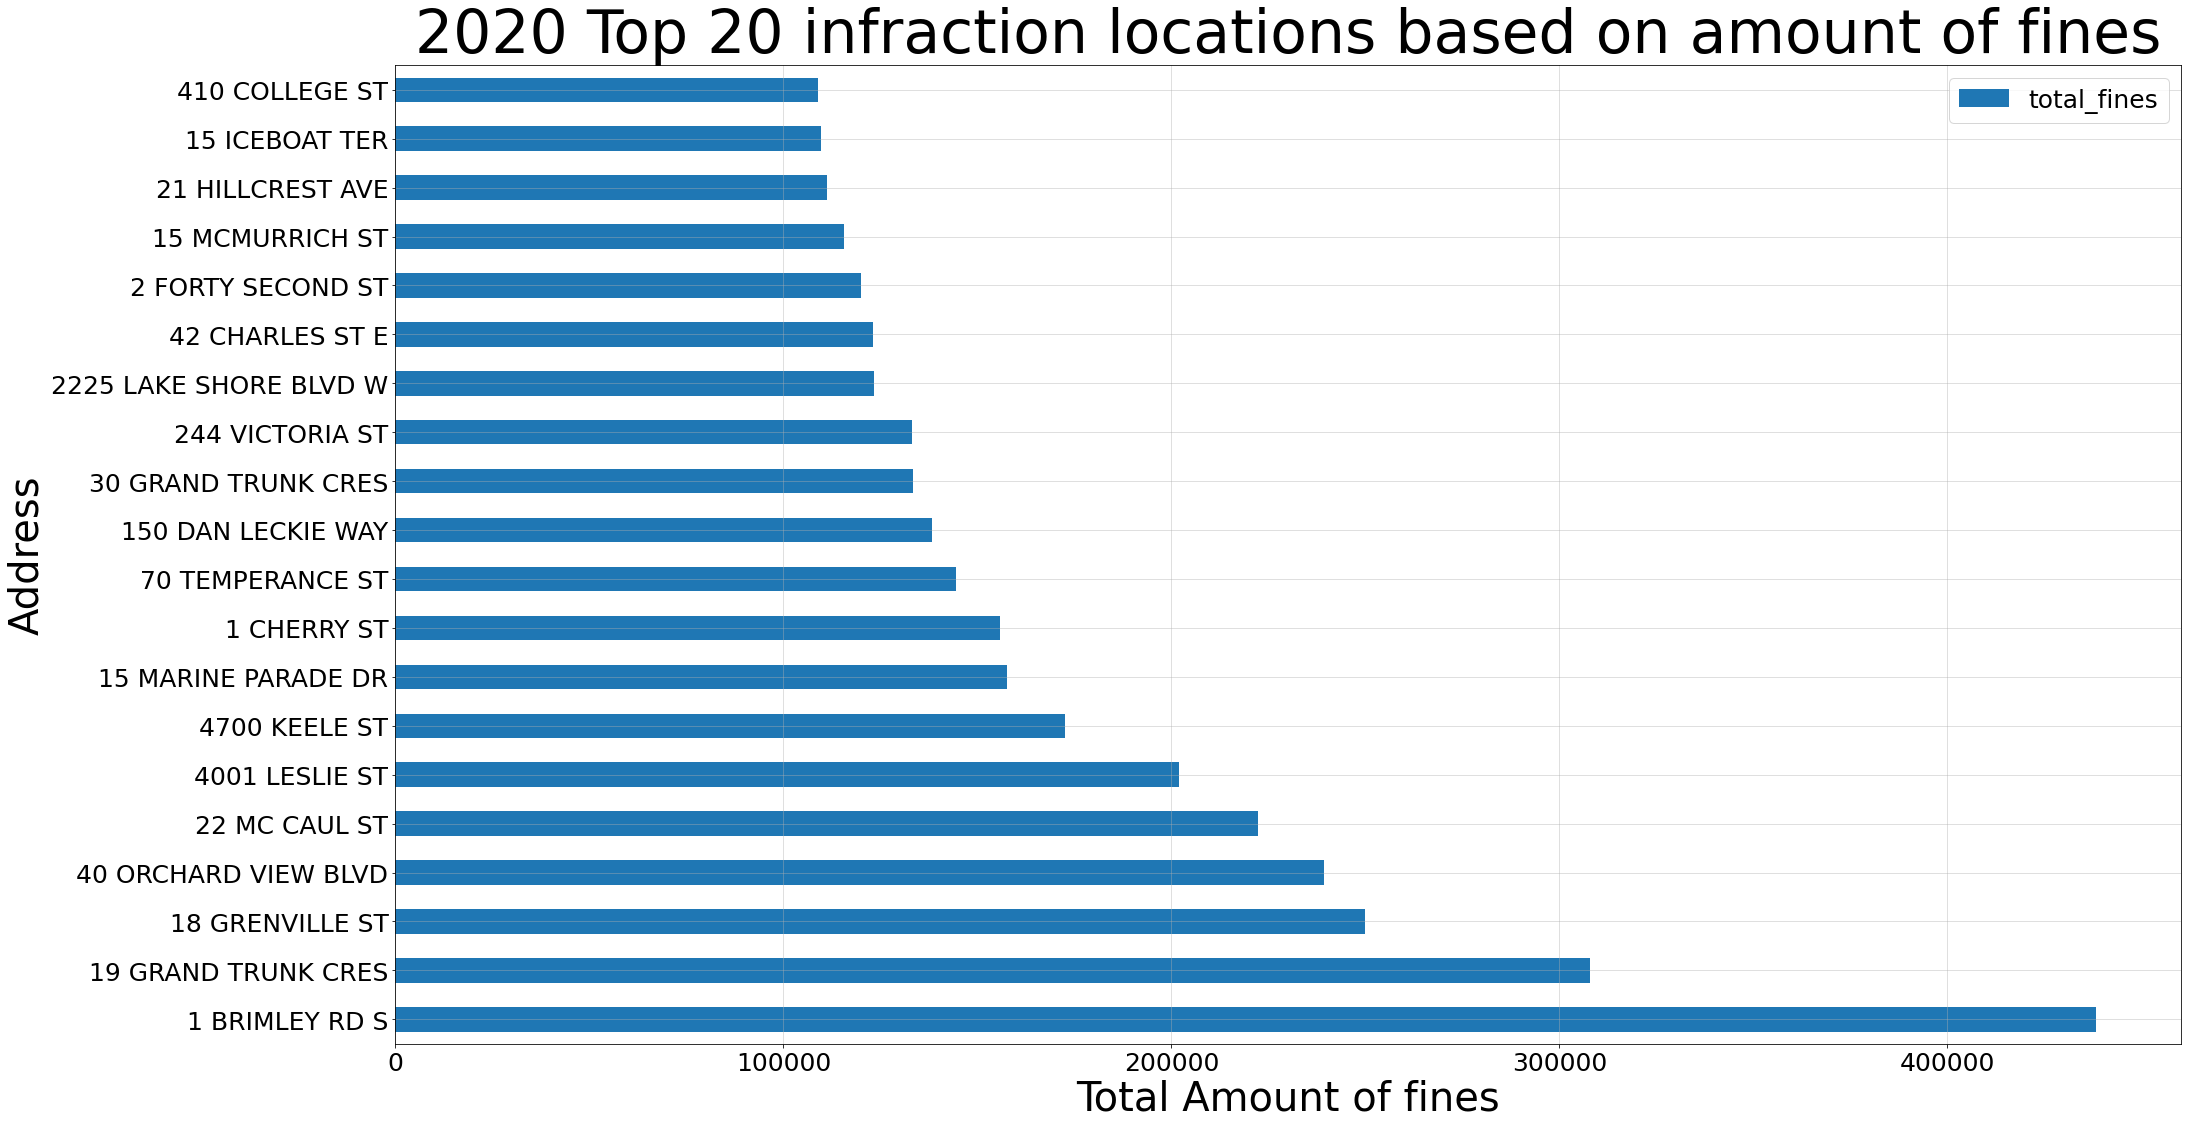

In [ ]:
#top 20 infraction locations based on fines collected 2020
top20_f=pd.DataFrame(parking_tags_data2020.groupby(['location2']).set_fine_amount.sum().sort_values(ascending=False).head(20).reset_index())
top20_f.rename(columns={'location2':'infraction_address','set_fine_amount':'total_fines'}, inplace=True)
top20_f.plot.barh(x='infraction_address',figsize=(32,18))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.xlabel('Total Amount of fines',fontsize=40)
plt.ylabel('Address',fontsize=40)
plt.title('2020 Top 20 infraction locations based on amount of fines', fontsize=60)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()


1 Brimley Road paid the most fines in 2020. This is the location of Bluffer's Park Beach in Scarborough.

In [ ]:
#top 20 infraction locations based on number of infractions for 2020
top20il=pd.DataFrame(parking_tags_data2020.location2.value_counts().head(20).reset_index())
top20il.rename(columns={'index':'infraction_address','location2':'infraction_frequency'}, inplace=True)
top20il['infraction_address'].replace(['JAMES ST','1 CHERRY ST'],['JAMES ST TORONTO','1 CHERRY ST TORONTO'], inplace= True)
top20il

,infraction_address,infraction_frequency
0,4001 LESLIE ST,5340
1,1 BRIMLEY RD S,3874
2,19 GRAND TRUNK CRES,3706
3,15 MARINE PARADE DR,3183
4,4700 KEELE ST,3149
5,2075 BAYVIEW AVE,3104
6,30 GRAND TRUNK CRES,2841
7,2183 LAKE SHORE BLVD W,2742
8,75 QUEENS WHARF RD,1998
9,5 VALHALLA INN RD,1923


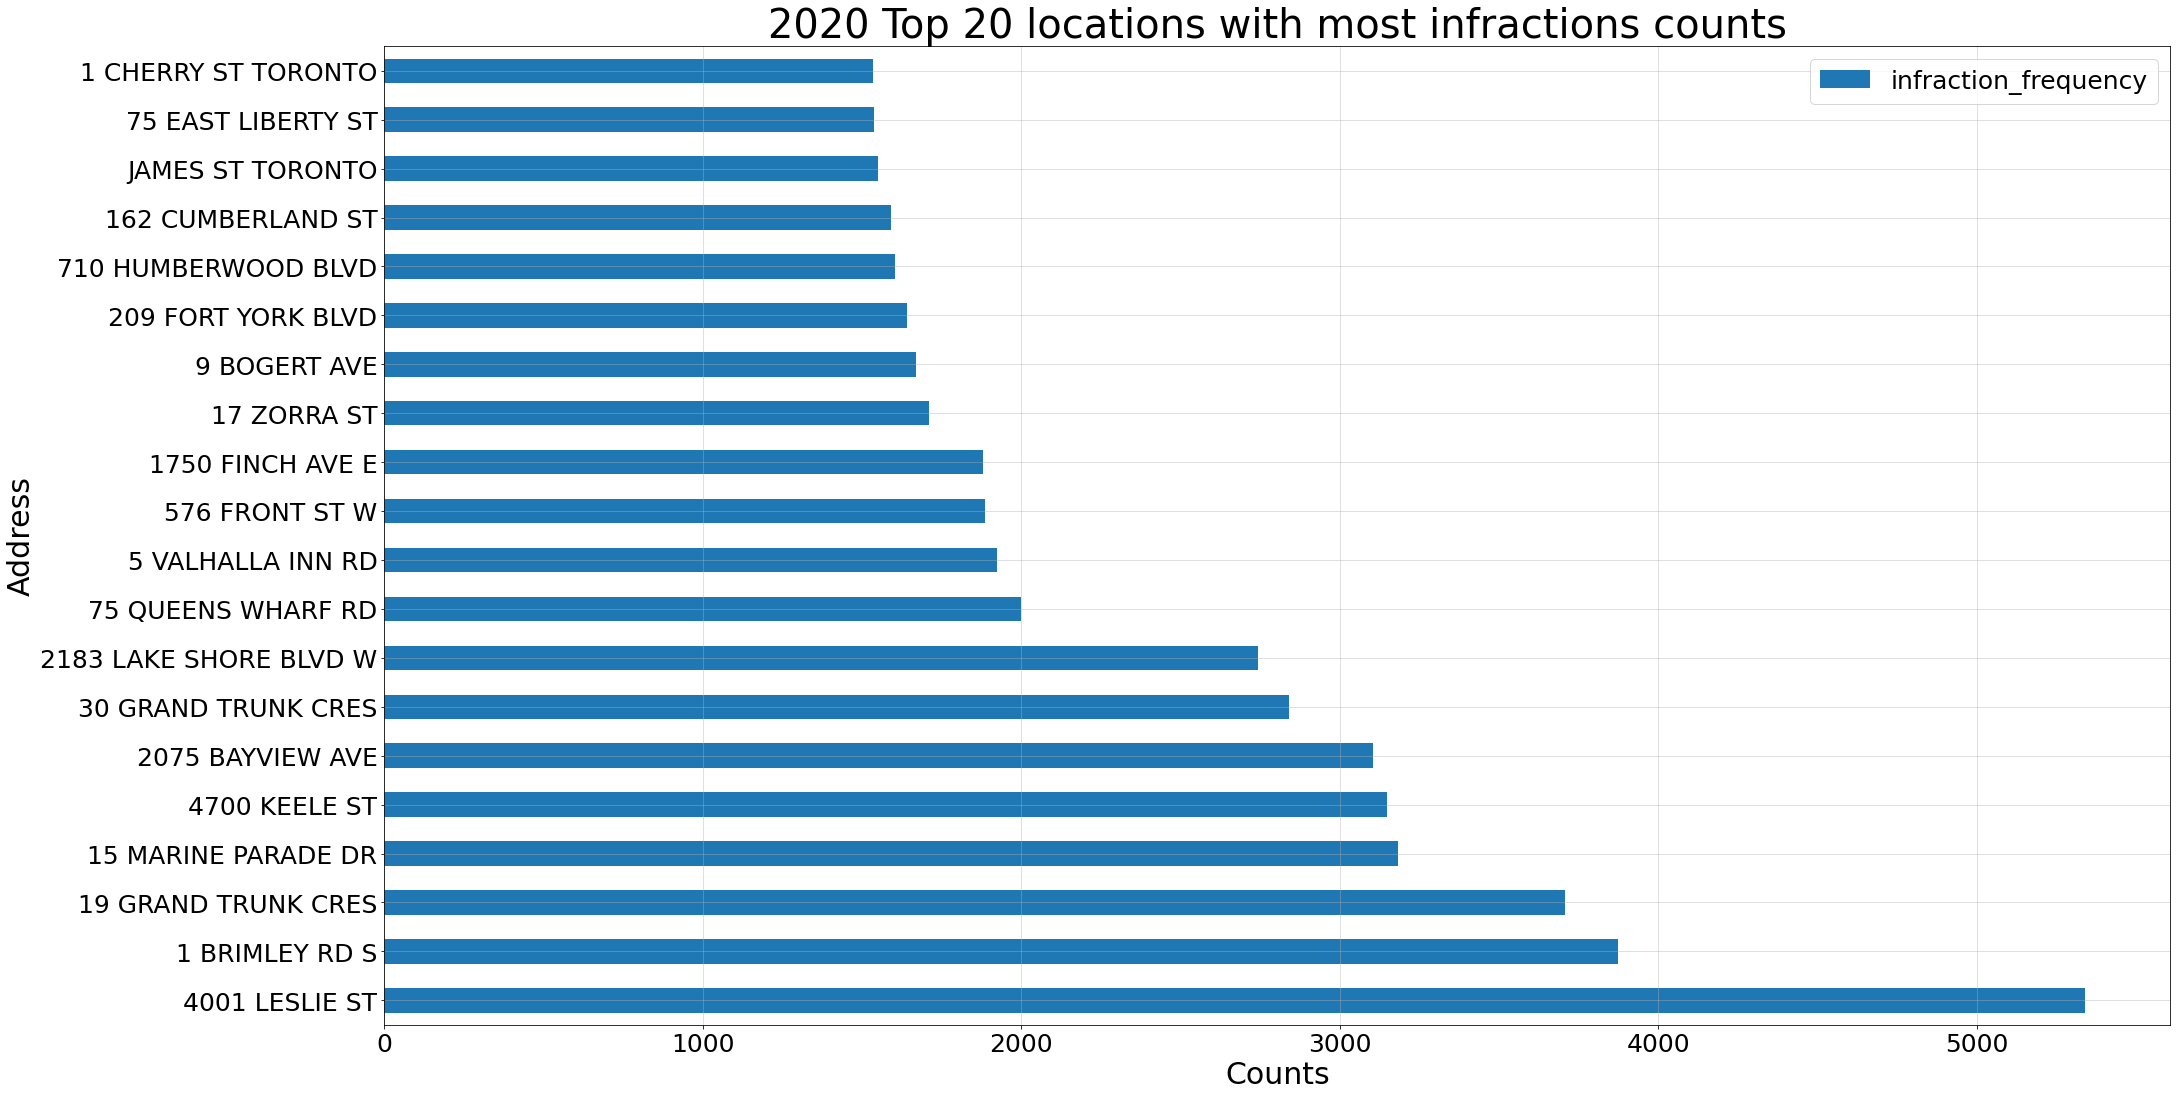

In [ ]:
top20il.plot.barh(x='infraction_address', figsize=(32,18))
plt.xlabel('Counts',fontsize=30)
plt.ylabel('Address',fontsize=30)
plt.title('2020 Top 20 locations with most infractions counts', fontsize=40)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()

4001 Leslie Street is the location where the most fines were issued. This is the location of North York's General Hospital.

In [ ]:
#Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="my_request")
 
#applying the rate limiter wrapper(to avoid timeout when requesting lat/lng coordinates)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
#function to find neares green P parking using geodesic distance(as the crow flies)
def find_nearest_greenP(lat, lng):
    distances = green_P_parking_df.apply(lambda row: geodesic((lat, lng), (row['lat'], row['lng'])).km, axis=1)
    return green_P_parking_df.loc[distances.idxmin(), 'address']

In [ ]:
#function to find nearest ttc stop using geodesic distance(as the crow flies)
def find_nearest_ttc(lat, lng):
    distances = ttc_stops.apply(lambda row: geodesic((lat, lng), (row['stop_lat'], row['stop_lon'])).km, axis=1)
    return ttc_stops.loc[distances.idxmin(), 'stop_name']

In [ ]:
#read greenP parking data 
green_P_parking_data=requests.get('https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b66466c3-69c8-4825-9c8b-04b270069193/resource/059cde7d-21bc-4f24-a533-6c2c3fc33ef1/download/green-p-parking-2019.json')
green_P_parking_df=pd.DataFrame(green_P_parking_data.json()['carparks'])


In [ ]:
#reading ttc stops
ttc_stops=pd.read_csv('/content/stops.txt')

In [ ]:
top20il['lat']=top20il['infraction_address'].apply(lambda lat: geocode(lat).latitude)
top20il['lng']=top20il['infraction_address'].apply(lambda lng: geocode(lng).longitude)

In [ ]:
#tacking on closest Green P Parking
top20il['address'] = top20il.apply(lambda row: find_nearest_greenP(row['lat'], row['lng']), axis=1)

In [ ]:
top20il=pd.merge(top20il,green_P_parking_df[['address','lat','lng']],on='address', how='left')

In [ ]:
top20il.rename(columns={'address':'closest_green_P_parking'}, inplace=True)
top20il['distance_to_greenP_in_km']=top20il.apply(lambda row: geodesic((row['lat_x'],row['lng_x']),(row['lat_y'],row['lng_y'])).km, axis=1)

In [ ]:
#tacking TTC stops info to dataframe
top20il['stop_name']=top20il.apply(lambda row: find_nearest_ttc(row['lat_x'], row['lng_x']), axis=1)

In [ ]:
top20il=pd.merge(top20il,ttc_stops[['stop_name','stop_lat','stop_lon']],on='stop_name', how='left')
top20il.rename(columns={'stop_name':'closest_ttc_stop'}, inplace=True)
top20il['distance_to_ttc_stop_in_km']=top20il.apply(lambda row: 
                                                    geodesic((row['lat_x'],row['lng_x']),(row['stop_lat'],row['stop_lon'])).km, axis=1)


Given the fact that a few Green P Parking spaces with the same name had a few coordinates(because of their size) and a few TTC stops had multiple coordinates as well(a road intersection can have up to 4 TTC stops: one for the bus traveling North, one for South, one for East, one for West), the "left join" with the "top 20 infraction locations" dataframe yielded more than 20 rows. So I manually selected the "non-duplicated" rows below.

In [ ]:
#del top20il, green_P_parking_data, ttc_stops

In [ ]:
correct_top20il=top20il.iloc[[0,2,8,10,11,12,14,16,17,19,20,23,24,25,26,27,28,29,31,32]].reset_index().drop(['index'], axis=1)

In [ ]:
#Table of 2020's Top 20 infraction locations with their closest Green P Parking and TTC stop respectively
correct_top20il

,infraction_address,infraction_frequency,lat_x,lng_x,closest_green_P_parking,lat_y,lng_y,distance_to_greenP_in_km,closest_ttc_stop,stop_lat,stop_lon,distance_to_ttc_stop_in_km
0,4001 LESLIE ST,5340,43.769228,-79.362558,Leslie Lot - 2760 Old Leslie Street,43.770058,-79.367484,0.407213,North York General Hospital - Main Entrance,43.769710,-79.363485,0.091852
1,1 BRIMLEY RD S,3874,43.705962,-79.235491,1 Brimley Road (Bluffer's Park),43.706640,-79.235437,0.075425,Barkdene Hills at Larwood Blvd,43.715441,-79.237913,1.071076
2,19 GRAND TRUNK CRES,3706,43.641681,-79.383041,40 York Street,43.6455358,-79.38272369999999,0.429066,Queens Quay West at Harbourfront Centre,43.639613,-79.381765,0.251782
3,15 MARINE PARADE DR,3183,43.629106,-79.475411,15 Marine Parade Drive,43.6267898,-79.4767453,0.279005,Marine Parade Dr (East) at Lake Shore Blvd West,43.629980,-79.476401,0.125741
4,4700 KEELE ST,3149,43.774939,-79.494257,3950 Keele Street,43.7655225,-79.491758,1.065377,Keele St at Canarctic Dr,43.775091,-79.493718,0.046596
5,2075 BAYVIEW AVE,3104,43.721690,-79.376572,2170 Bayview avenue,43.723875,-79.379571,0.342520,Hospital Rd at Wellness Way East Side (Sunnybr...,43.721780,-79.376853,0.024720
6,30 GRAND TRUNK CRES,2841,43.642161,-79.382900,40 York Street,43.6455358,-79.38272369999999,0.375178,Queens Quay West at Harbourfront Centre,43.639613,-79.381765,0.297593
7,2183 LAKE SHORE BLVD W,2742,43.623424,-79.478796,2195 Lake shore Blvd West (Parks),43.62277398955143,-79.47673382209018,0.181448,Marine Parade Dr Loop at Lake Shore Blvd West,43.622551,-79.480911,0.196331
8,75 QUEENS WHARF RD,1998,43.638498,-79.397993,545 Lake Shore Boulevard West,43.6364562,-79.3986913,0.233777,Bathurst St at Fort York Blvd,43.638684,-79.400466,0.200625
9,5 VALHALLA INN RD,1923,43.641459,-79.557843,Kipling South Lot - 400 Munster Avenue,43.636572,-79.534117,1.990008,The East Mall at Valhalla Inn Rd,43.641605,-79.557891,0.016681


In [ ]:
correct_top20il.to_csv('top_20_il_2020.csv', index=False)

In [ ]:
#converting date values to datetime in order to get time series plots
parking_tags_data2020['date_of_infraction']=pd.to_datetime(parking_tags_data2020['date_of_infraction'], format='%Y%m%d')
parking_tags_data2020['month']=parking_tags_data2020['date_of_infraction'].dt.month
parking_tags_data2020['day_of_week']=parking_tags_data2020['date_of_infraction'].dt.weekday
parking_tags_data2020['season']=parking_tags_data2020['month'].apply(lambda x:x%12 // 3 + 1 )

In [ ]:
daily=parking_tags_data2020.groupby(parking_tags_data2020.date_of_infraction)['tag_number_masked'].count().reset_index().rename(
    columns={'date_of_infraction': 'Date','tag_number_masked':'Counts'})
px.line(daily,x='Date', y='Counts', title='2020 Daily Infractions Count').update_layout(
    shapes=[dict(type= 'line', yref= 'paper', y0= 0, y1= 1,xref= 'x', x0= "2020-03-01", x1= "2020-03-01")]).add_annotation(
        x="2020-03-01",text='COVID19 Pandemic')


The announcement of lockdown due to the COVID19 pandemic in March 2020 caused a significant drop in parking infractions being issued out. It was until around September of 2020 where things picked back up a little bit.

In [ ]:
# 0=Monday
# 1=Tuesday
# 2=Wednesday
# 3=Thursday
# 4=Friday
# 5=Saturday
# 6=Sunday
#
day_of_week=parking_tags_data2020.groupby(parking_tags_data2020.day_of_week)['tag_number_masked'].count().reset_index().rename(
    columns={'day_of_week': 'Day of Week','tag_number_masked':'Counts'})
px.line(day_of_week, x='Day of Week', y='Counts', title='2020 Day of Week Infractions Counts')


Tuesdays and Wednesdays are when most parking fines are handed out in 2020.

In [ ]:
monthly=parking_tags_data2020.groupby(parking_tags_data2020.month)['tag_number_masked'].count().reset_index().rename(
    columns={'month': 'Month','tag_number_masked':'Counts'})
px.line(monthly, x='Month', y='Counts', title='2020 Monthly Infractions Count')


January and September seem to be where the most fines are handed out in 2020.

In [ ]:
# 1=Winter
# 2=Spring
# 3=Summer
# 4=Fall
season=parking_tags_data2020.groupby(parking_tags_data2020.season)['tag_number_masked'].count().reset_index().rename(
    columns={'season': 'Season','tag_number_masked':'Counts'})
px.line(season, x='Season', y='Counts', title='2020 Seasonal Infractions Count')


Spring is the time where the least amount of parking fines are handed out, whereas autmn and winter are when most of the fines are handed out in 2020.

## 2020 Map of Top 20 Infraction Locations

Click on the follwing link:

[2020 map of top 20 infraction locations](https://www.google.com/maps/d/edit?mid=1YFhGd5u9UJ2VOoQacHUBRjPqMUWn3TjW&usp=sharing)



Text(0.5, 1.0, 'City of Toronto Wards')

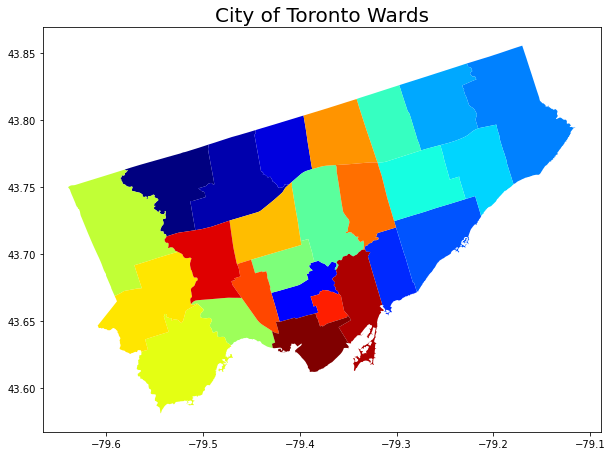

In [3]:
gpd.read_file('/content/City Wards Data.shp').plot(cmap='jet', figsize=(10,10))
plt.title('City of Toronto Wards', fontsize=20)

## 2019 DATA

In [ ]:
#load parking tag files for 2019
parking_tags_data2019=[pd.read_csv("/content/Parking_Tags_Data_2019.00"+f"{i}"+".csv") for i in range(9)]
parking_tags_data2019=pd.concat(parking_tags_data2019)
parking_tags_data2019[parking_tags_data2019['location2'].isna()].shape


(174, 11)

In [ ]:
parking_tags_data2019.shape

(2213939, 11)

In [ ]:
parking_tags_data2019.describe()

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction
count,2.213939e+06,2.213939e+06,2.213939e+06,2.211998e+06
mean,2.019068e+07,9.088405e+01,4.897342e+01,1.156076e+03
std,3.360803e+02,1.367282e+02,4.760441e+01,6.070207e+02
min,2.019010e+07,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.019041e+07,3.000000e+00,3.000000e+01,7.530000e+02
50%,2.019071e+07,9.000000e+00,3.000000e+01,1.204000e+03
75%,2.019100e+07,2.070000e+02,5.000000e+01,1.621000e+03
max,2.019123e+07,4.370000e+02,5.000000e+02,3.512000e+03


In [ ]:
parking_tags_data2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213939 entries, 0 to 213939
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   tag_number_masked       object 
 1   date_of_infraction      int64  
 2   infraction_code         int64  
 3   infraction_description  object 
 4   set_fine_amount         int64  
 5   time_of_infraction      float64
 6   location1               object 
 7   location2               object 
 8   location3               object 
 9   location4               object 
 10  province                object 
dtypes: float64(1), int64(3), object(7)
memory usage: 202.7+ MB


In [ ]:
parking_tags_data2019.isna().sum()

tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction           1941
location1                  232407
location2                     174
location3                 2054399
location4                 2053991
province                        1
dtype: int64

In [ ]:
parking_tags_data2019.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code             int64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [ ]:
#percentage of null location values for 2019
parking_tags_data2019[parking_tags_data2019['location2'].isna()].shape[0]/parking_tags_data2019.shape[0]

7.859295129630942e-05

In [ ]:
#selecting non null location2 since it's only small percentage
parking_tags_data2019=parking_tags_data2019[parking_tags_data2019['location2'].notna()]

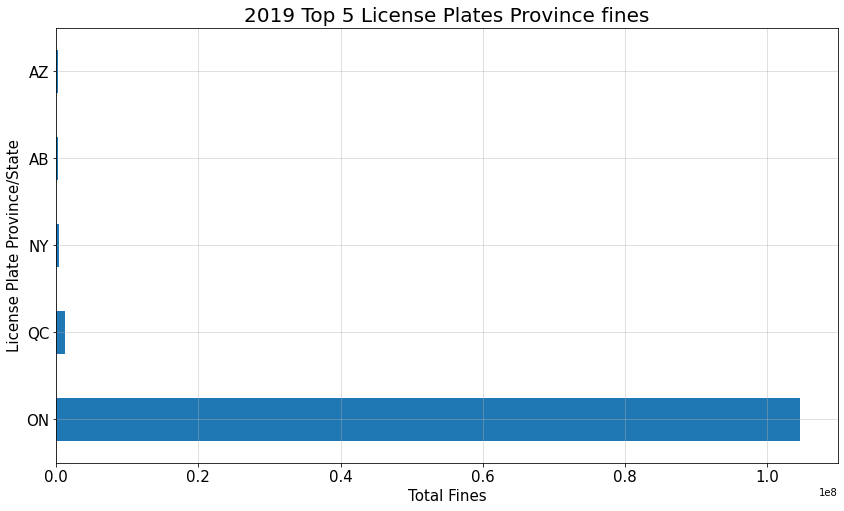

In [ ]:
plt.figure(figsize=(14,8)) 
parking_tags_data2019.groupby(['province']).set_fine_amount.sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.xlabel('Total Fines',fontsize=15)
plt.ylabel('License Plate Province/State',fontsize=15)
plt.title('2019 Top 5 License Plates Province fines', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)


In [ ]:
plt.figure(figsize=(16,12)) 
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('2019 Histogram of Infraction Codes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.bar(collections.Counter(parking_tags_data2019.infraction_code).keys(), collections.Counter(parking_tags_data2019.infraction_code).values())


<BarContainer object of 20 artists>

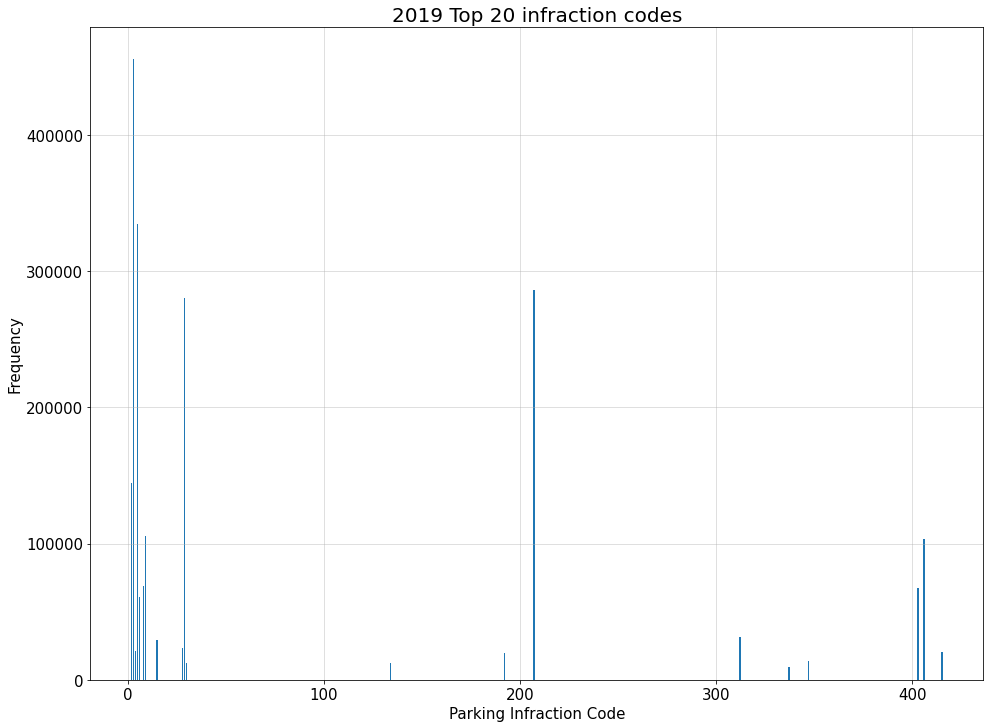

In [ ]:
plt.figure(figsize=(16,12)) 
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('2019 Top 20 infraction codes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.bar(*zip(*collections.Counter(parking_tags_data2019.infraction_code).most_common(20)))

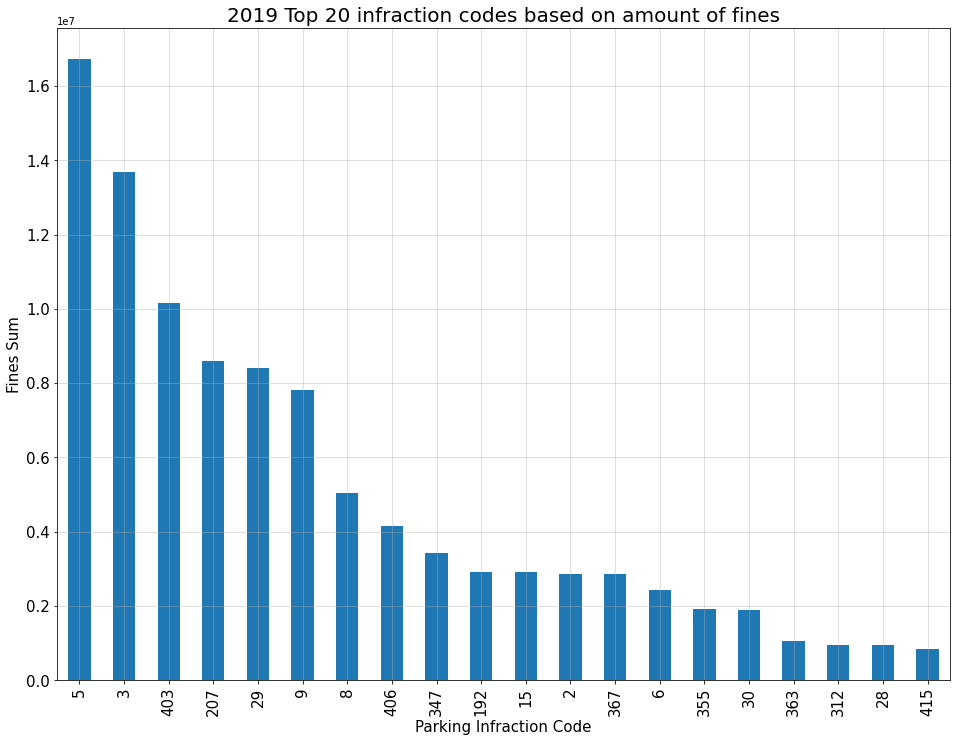

In [ ]:
plt.figure(figsize=(16,12)) 
parking_tags_data2019.groupby(['infraction_code']).set_fine_amount.sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Fines Sum',fontsize=15)
plt.title('2019 Top 20 infraction codes based on amount of fines', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)


In [ ]:
#total fines collected in 2019
parking_tags_data2019.set_fine_amount.sum()

108416630

In 2019 a total of 108,416,630 CAD worth of fines were handed out in the Greater Toronto Area.

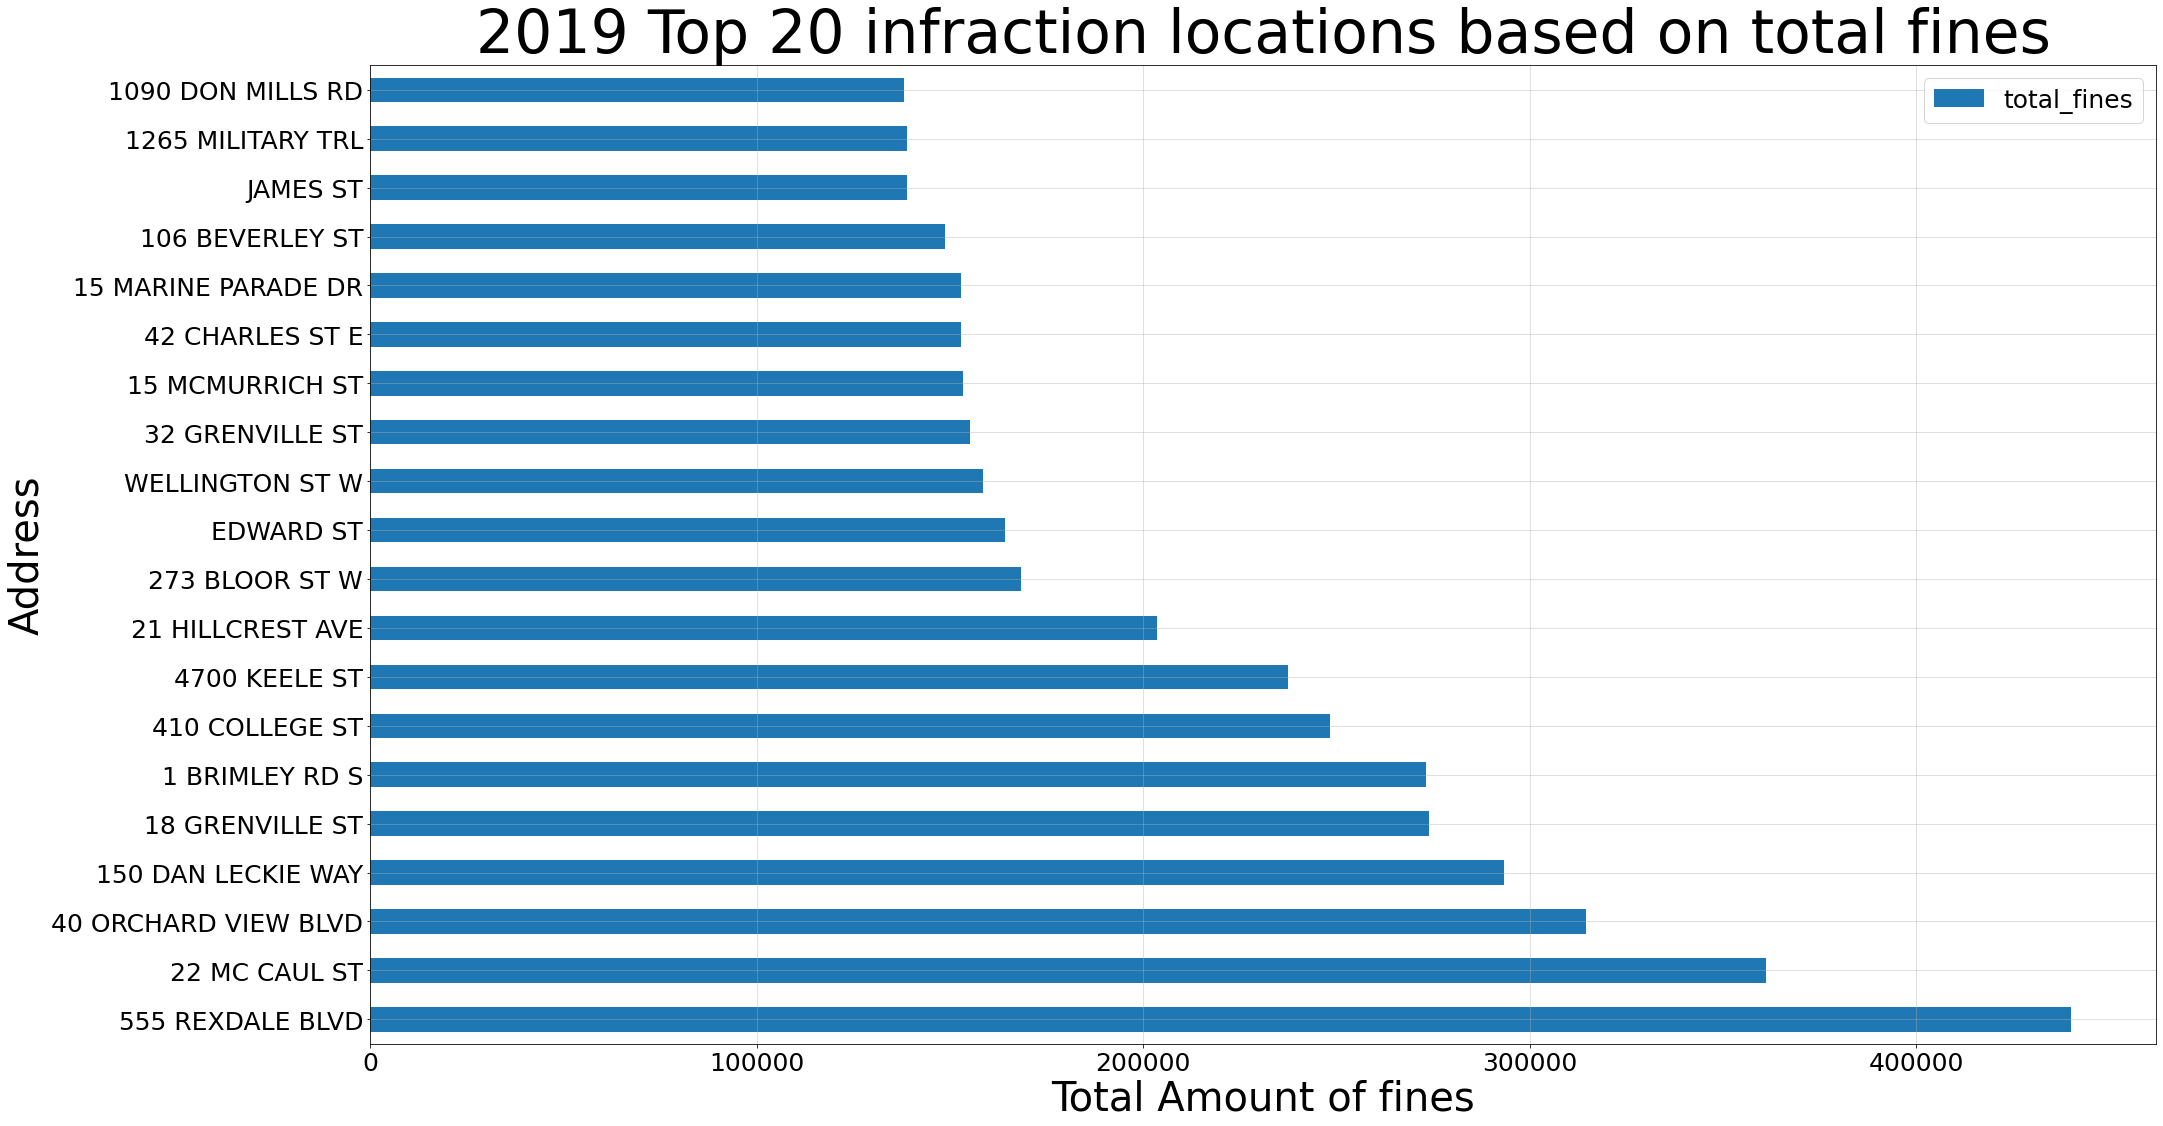

In [ ]:
#top 20 infraction locations based on fines collected 2019
top19_f=pd.DataFrame(parking_tags_data2019.groupby(['location2']).set_fine_amount.sum().sort_values(ascending=False).head(20).reset_index())
top19_f.rename(columns={'location2':'infraction_address','set_fine_amount':'total_fines'}, inplace=True)
top19_f.plot.barh(x='infraction_address',figsize=(32,18))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.xlabel('Total Amount of fines',fontsize=40)
plt.ylabel('Address',fontsize=40)
plt.title('2019 Top 20 infraction locations based on total fines', fontsize=60)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()


555 Rexdale Blvd paid the most fines in 2019.

This location is where Casino Woodbine and Woodbine Racetrack is located.

In [ ]:
#top 20 infraction locations for 2019
top19il=pd.DataFrame(parking_tags_data2019.location2.value_counts().head(20).reset_index())
top19il.rename(columns={'index':'infraction_address','location2':'infraction_frequency'}, inplace=True)
top19il['infraction_address']=top19il['infraction_address'] + ' Toronto'

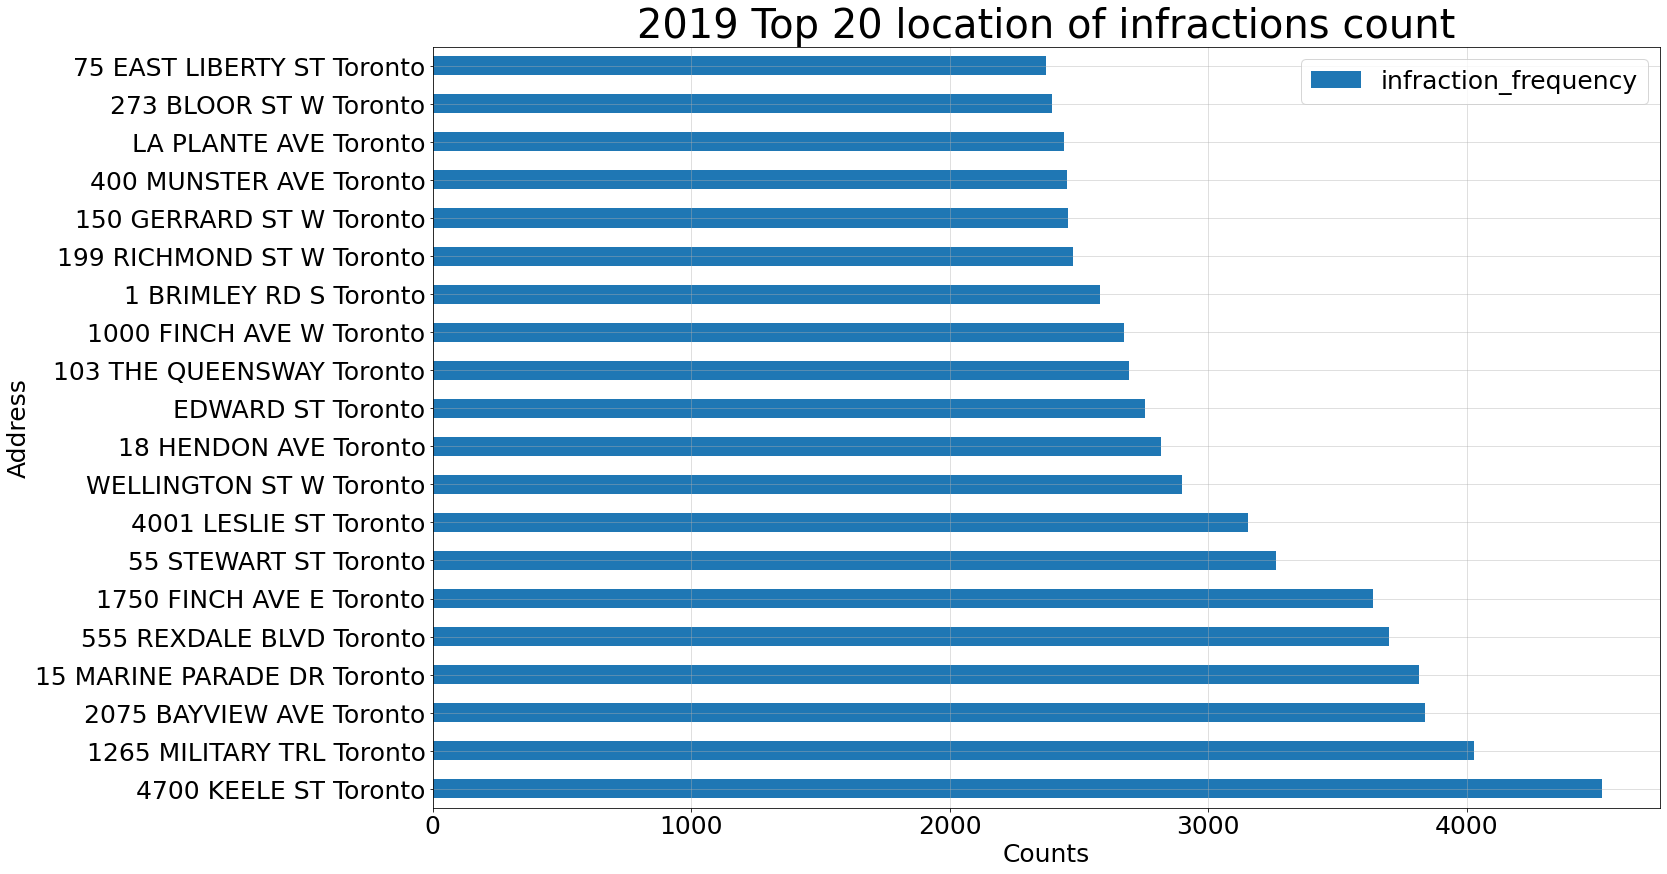

In [ ]:
top19il.plot.barh(x='infraction_address', figsize=(22,14))
plt.xlabel('Counts',fontsize=25)
plt.ylabel('Address',fontsize=25)
plt.title('2019 Top 20 location of infractions count', fontsize=40)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.show()

4700 Keele street is where most number of fines were handed out in 2019.

This is a Shoppers Drugmart location at York University Campus North York.

In [ ]:
top19il['lat']=top19il['infraction_address'].apply(lambda lat: geocode(lat).latitude)
top19il['lng']=top19il['infraction_address'].apply(lambda lng: geocode(lng).longitude)

In [ ]:
#tacking on closest Green P Parking
top19il['address'] = top19il.apply(lambda row: find_nearest_greenP(row['lat'], row['lng']), axis=1)

In [ ]:
top19il=pd.merge(top19il,green_P_parking_df[['address','lat','lng']],on='address', how='left')

In [ ]:
top19il.rename(columns={'address':'closest_green_P_parking'}, inplace=True)
top19il['distance_to_greenP_in_km']=top19il.apply(lambda row: geodesic((row['lat_x'],row['lng_x']),(row['lat_y'],row['lng_y'])).km, axis=1)

In [ ]:
#tacking TTC stops info to dataframe
top19il['stop_name']=top19il.apply(lambda row: find_nearest_ttc(row['lat_x'], row['lng_x']), axis=1)

In [ ]:
top19il=pd.merge(top19il,ttc_stops[['stop_name','stop_lat','stop_lon']],on='stop_name', how='left')
top19il.rename(columns={'stop_name':'closest_ttc_stop'}, inplace=True)
top19il['distance_to_ttc_stop_in_km']=top19il.apply(lambda row: 
top19il                                                    geodesic((row['lat_x'],row['lng_x']),(row['stop_lat'],row['stop_lon'])).km, axis=1)


In [ ]:
correct_top19il=top19il.iloc[[0,1,3,5,6,7,8,12,14,15,16,18,20,22,28,29,30,40,41,42]].reset_index().drop(['index'], axis=1)

In [ ]:
#Table of 2019's top 20 infraction locations with their closest Green P Parking and TTC stop respectively
correct_top19il

,infraction_address,infraction_frequency,lat_x,lng_x,closest_green_P_parking,lat_y,lng_y,distance_to_greenP_in_km,closest_ttc_stop,stop_lat,stop_lon,distance_to_ttc_stop_in_km
0,4700 KEELE ST Toronto,4522,43.774939,-79.494257,3950 Keele Street,43.7655225,-79.491758,1.065377,Keele St at Canarctic Dr,43.775091,-79.493718,0.046596
1,1265 MILITARY TRL Toronto,4028,43.783364,-79.187081,1530 Markham Road - minor capital repairs onsite,43.789507,-79.237915,4.148318,University of Toronto Scarborough,43.784510,-79.184841,0.220790
2,2075 BAYVIEW AVE Toronto,3838,43.721690,-79.376572,2170 Bayview avenue,43.723875,-79.379571,0.342520,Hospital Rd at Wellness Way East Side (Sunnybr...,43.721780,-79.376853,0.024720
3,15 MARINE PARADE DR Toronto,3817,43.629106,-79.475411,15 Marine Parade Drive,43.6267898,-79.4767453,0.279005,Marine Parade Dr (East) at Lake Shore Blvd West,43.629980,-79.476401,0.125741
4,555 REXDALE BLVD Toronto,3698,43.720245,-79.612655,14 Barkwin Dr.,43.738381,-79.56528279999998,4.316012,Rexdale Blvd at Humberwood Blvd,43.720614,-79.612281,0.050869
5,1750 FINCH AVE E Toronto,3637,43.793791,-79.350308,Don Mills Lot - 1800 Sheppard Ave East,43.775815,-79.346707,2.018260,Finch Ave East at Seneca Hill Dr (Opposite Sen...,43.793442,-79.350627,0.046543
6,55 STEWART ST Toronto,3261,43.643224,-79.402230,10 Portland Street,43.641635,-79.399159,0.304256,Bathurst St at King St West,43.644139,-79.402833,0.112713
7,4001 LESLIE ST Toronto,3154,43.769228,-79.362558,Leslie Lot - 2760 Old Leslie Street,43.770058,-79.367484,0.407213,North York General Hospital - Main Entrance,43.769710,-79.363485,0.091852
8,WELLINGTON ST W Toronto,2898,43.645008,-79.390471,363 Adelaide Street West,43.646712,-79.394910,0.405102,King St West at Blue Jays Way East Side,43.646101,-79.391644,0.153952
9,18 HENDON AVE Toronto,2817,43.781577,-79.416817,Finch West Lot - 18 Hendon Ave,43.782032,-79.416368,0.062120,Yonge St at Hendon Ave (Finch Station),43.781711,-79.416193,0.052356


In [ ]:
correct_top19il.to_csv('top_20_il_2019.csv', index=False)

In [ ]:
parking_tags_data2019['date_of_infraction']=pd.to_datetime(parking_tags_data2019['date_of_infraction'], format='%Y%m%d')
parking_tags_data2019['month']=parking_tags_data2019['date_of_infraction'].dt.month
parking_tags_data2019['day_of_week']=parking_tags_data2019['date_of_infraction'].dt.weekday
parking_tags_data2019['season']=parking_tags_data2019['month'].apply(lambda x:x%12 // 3 + 1 )

In [ ]:
daily=parking_tags_data2019.groupby(parking_tags_data2019.date_of_infraction)['tag_number_masked'].count().reset_index().rename(
    columns={'date_of_infraction': 'Date','tag_number_masked':'Counts'})
px.line(daily,x='Date', y='Counts', title='2019 Daily Infractions Count')


In [ ]:
# 0=Monday
# 1=Tuesday
# 2=Wednesday
# 3=Thursday
# 4=Friday
# 5=Saturday
# 6=Sunday
#
day_of_week=parking_tags_data2019.groupby(parking_tags_data2019.day_of_week)['tag_number_masked'].count().reset_index().rename(
    columns={'day_of_week': 'Day of Week','tag_number_masked':'Counts'})
px.line(day_of_week, x='Day of Week', y='Counts', title='2019 Day of Week Infractions Count')


Tuesdays and Fridays seem to be the most popular days where fines are issued in 2019.

In [ ]:
monthly=parking_tags_data2019.groupby(parking_tags_data2019.month)['tag_number_masked'].count().reset_index().rename(
    columns={'month': 'Month','tag_number_masked':'Counts'})
px.line(monthly, x='Month', y='Counts', title='2019 Monthly Infractions Count')


October is the month with the highest amount of infractions issued in 2019.

March and July are a close second.

In [ ]:
# 1=Winter
# 2=Spring
# 3=Summer
# 4=Fall
season=parking_tags_data2019.groupby(parking_tags_data2019.season)['tag_number_masked'].count().reset_index().rename(
    columns={'season': 'Season','tag_number_masked':'Counts'})
px.line(season, x='Season', y='Counts', title='2019 Seasonal Infractions Count')


Autumn is the season where most fines were issued followed by Spring in 2019.

## 2019 Map of Top 20 Infraction Locations

Click on the following link:

[2019 Map of Top 20 Infraction Locations](https://www.google.com/maps/d/edit?mid=1R6Hcl-8Oafjqyj-9FJo5g8YpdDm1OmBH&usp=sharing)

Text(0.5, 1.0, 'City of Toronto Wards')

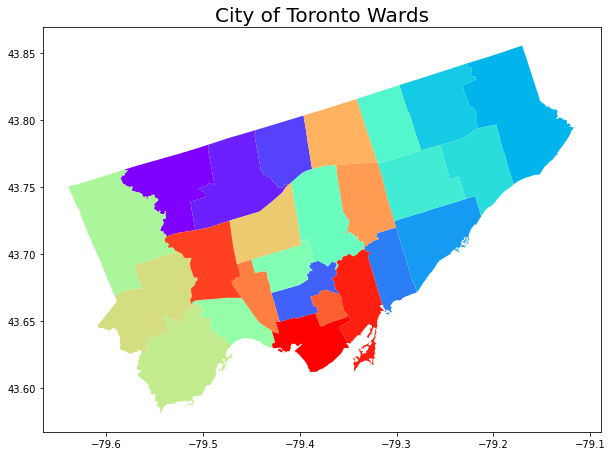

In [11]:
gpd.read_file('/content/City Wards Data.shp').plot(cmap='rainbow', figsize=(10,10))
plt.title('City of Toronto Wards', fontsize=20)

## 2018 DATA

In [ ]:
#load parking tag files for 2018
parking_tags_data2018=[pd.read_csv("/content/Parking_Tags_Data_2018_"+f"{i+1}"+".csv") for i in range(3)]
parking_tags_data2018=pd.concat(parking_tags_data2018)
parking_tags_data2018[parking_tags_data2018['location2'].isna()].shape


(173, 11)

In [ ]:
parking_tags_data2018.shape

(2044288, 11)

In [ ]:
parking_tags_data2018.describe()

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction
count,2.044288e+06,2.044288e+06,2.044288e+06,2.042756e+06
mean,2.018068e+07,8.779510e+01,4.901790e+01,1.146483e+03
std,3.412525e+02,1.353905e+02,4.744234e+01,6.032284e+02
min,2.018010e+07,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.018041e+07,4.000000e+00,3.000000e+01,7.590000e+02
50%,2.018070e+07,9.000000e+00,3.000000e+01,1.158000e+03
75%,2.018100e+07,2.070000e+02,5.000000e+01,1.613000e+03
max,2.018123e+07,4.240000e+02,4.500000e+02,3.458000e+03


In [ ]:
parking_tags_data2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044288 entries, 0 to 544287
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   tag_number_masked       object 
 1   date_of_infraction      int64  
 2   infraction_code         int64  
 3   infraction_description  object 
 4   set_fine_amount         int64  
 5   time_of_infraction      float64
 6   location1               object 
 7   location2               object 
 8   location3               object 
 9   location4               object 
 10  province                object 
dtypes: float64(1), int64(3), object(7)
memory usage: 187.2+ MB


In [ ]:
parking_tags_data2018.isna().sum()

tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction           1532
location1                  185747
location2                     173
location3                 1903837
location4                 1903301
province                        0
dtype: int64

In [ ]:
parking_tags_data2018.dtypes

tag_number_masked          object
date_of_infraction          int64
infraction_code             int64
infraction_description     object
set_fine_amount             int64
time_of_infraction        float64
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [ ]:
#percentage of null location values for 2018
parking_tags_data2018[parking_tags_data2018['location2'].isna()].shape[0]/parking_tags_data2018.shape[0]

8.462604094922047e-05

In [ ]:
#selecting non null location2 since it's only small percentage
parking_tags_data2018=parking_tags_data2018[parking_tags_data2018['location2'].notna()]

In [ ]:
plt.figure(figsize=(16,12)) 
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('2018 Histogram of Infraction Codes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.bar(collections.Counter(parking_tags_data2018.infraction_code).keys(), collections.Counter(parking_tags_data2018.infraction_code).values())


<BarContainer object of 20 artists>

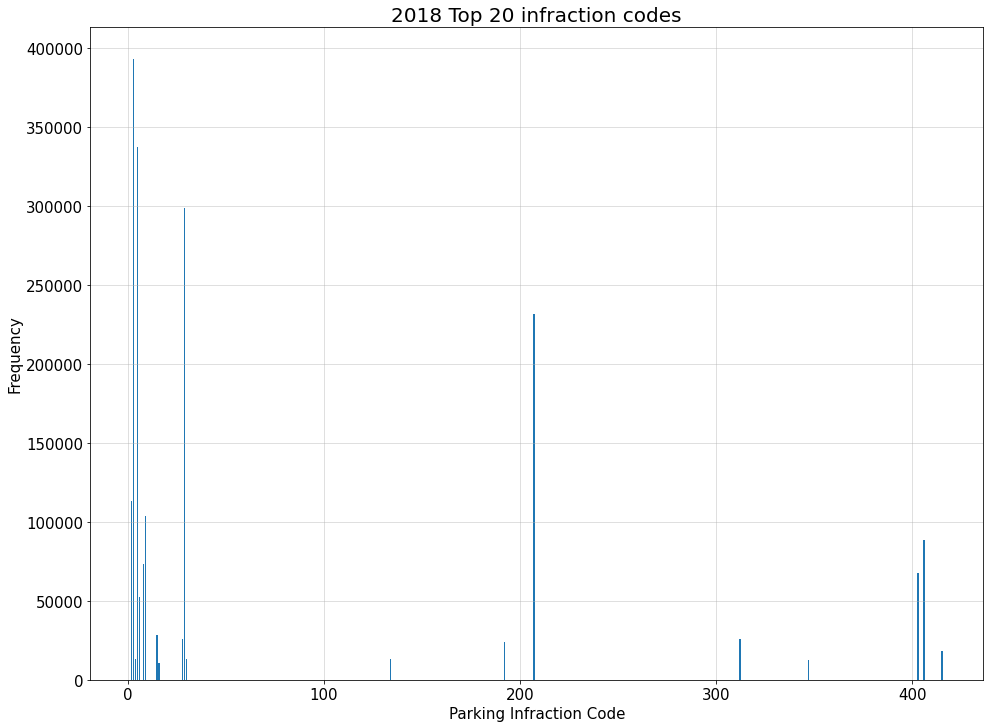

In [ ]:
plt.figure(figsize=(16,12)) 
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('2018 Top 20 infraction codes', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.bar(*zip(*collections.Counter(parking_tags_data2018.infraction_code).most_common(20)))

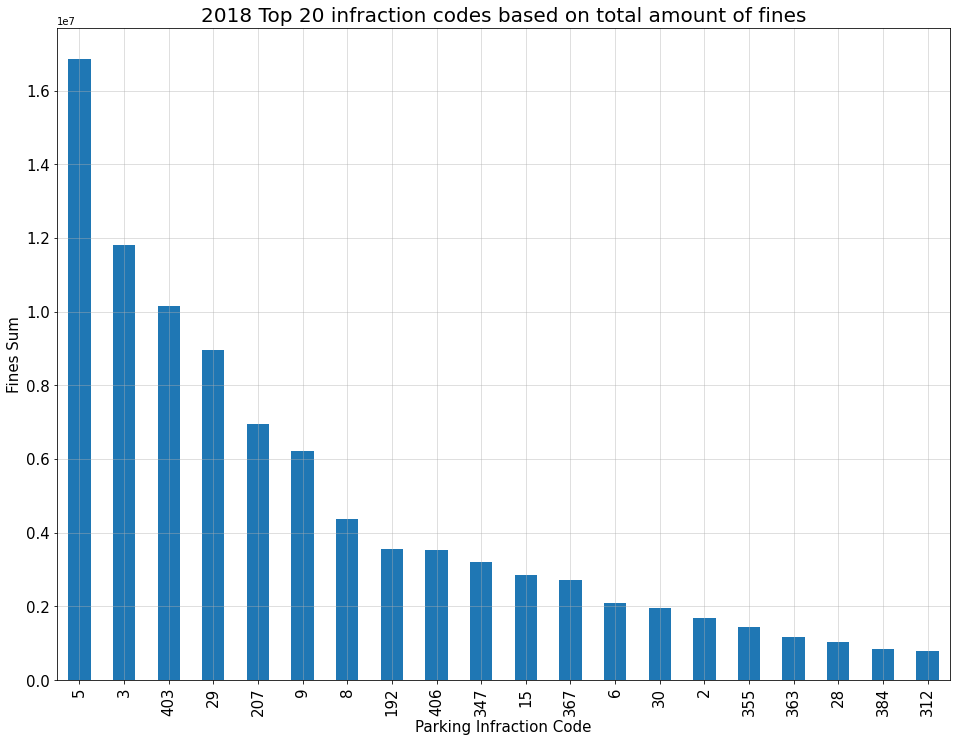

In [ ]:
plt.figure(figsize=(16,12)) 
parking_tags_data2018.groupby(['infraction_code']).set_fine_amount.sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel('Parking Infraction Code',fontsize=15)
plt.ylabel('Fines Sum',fontsize=15)
plt.title('2018 Top 20 infraction codes based on total amount of fines', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)


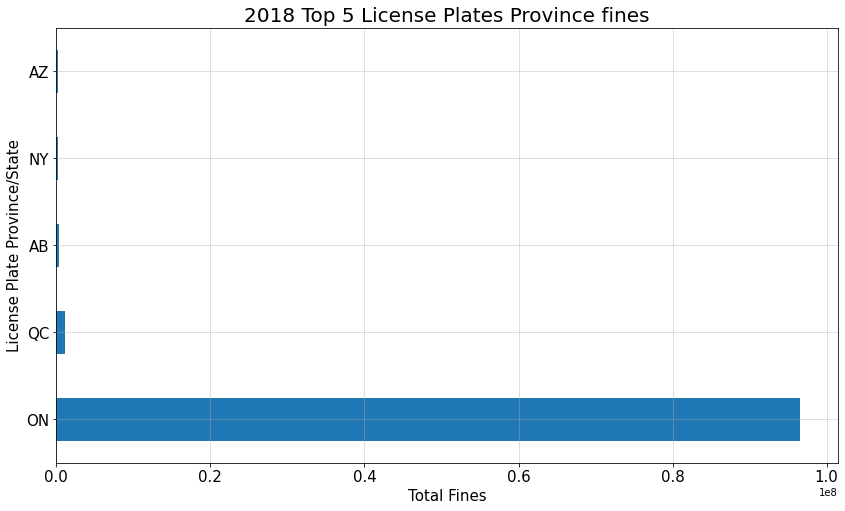

In [ ]:
plt.figure(figsize=(14,8)) 
parking_tags_data2018.groupby(['province']).set_fine_amount.sum().sort_values(ascending=False).head(5).plot(kind='barh')
plt.xlabel('Total Fines',fontsize=15)
plt.ylabel('License Plate Province/State',fontsize=15)
plt.title('2018 Top 5 License Plates Province fines', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)


In [ ]:
#total fines collected in 2018
parking_tags_data2018.set_fine_amount.sum()

100198155

In 2018, there were 100,198,155 CAD worth of fines issued. 

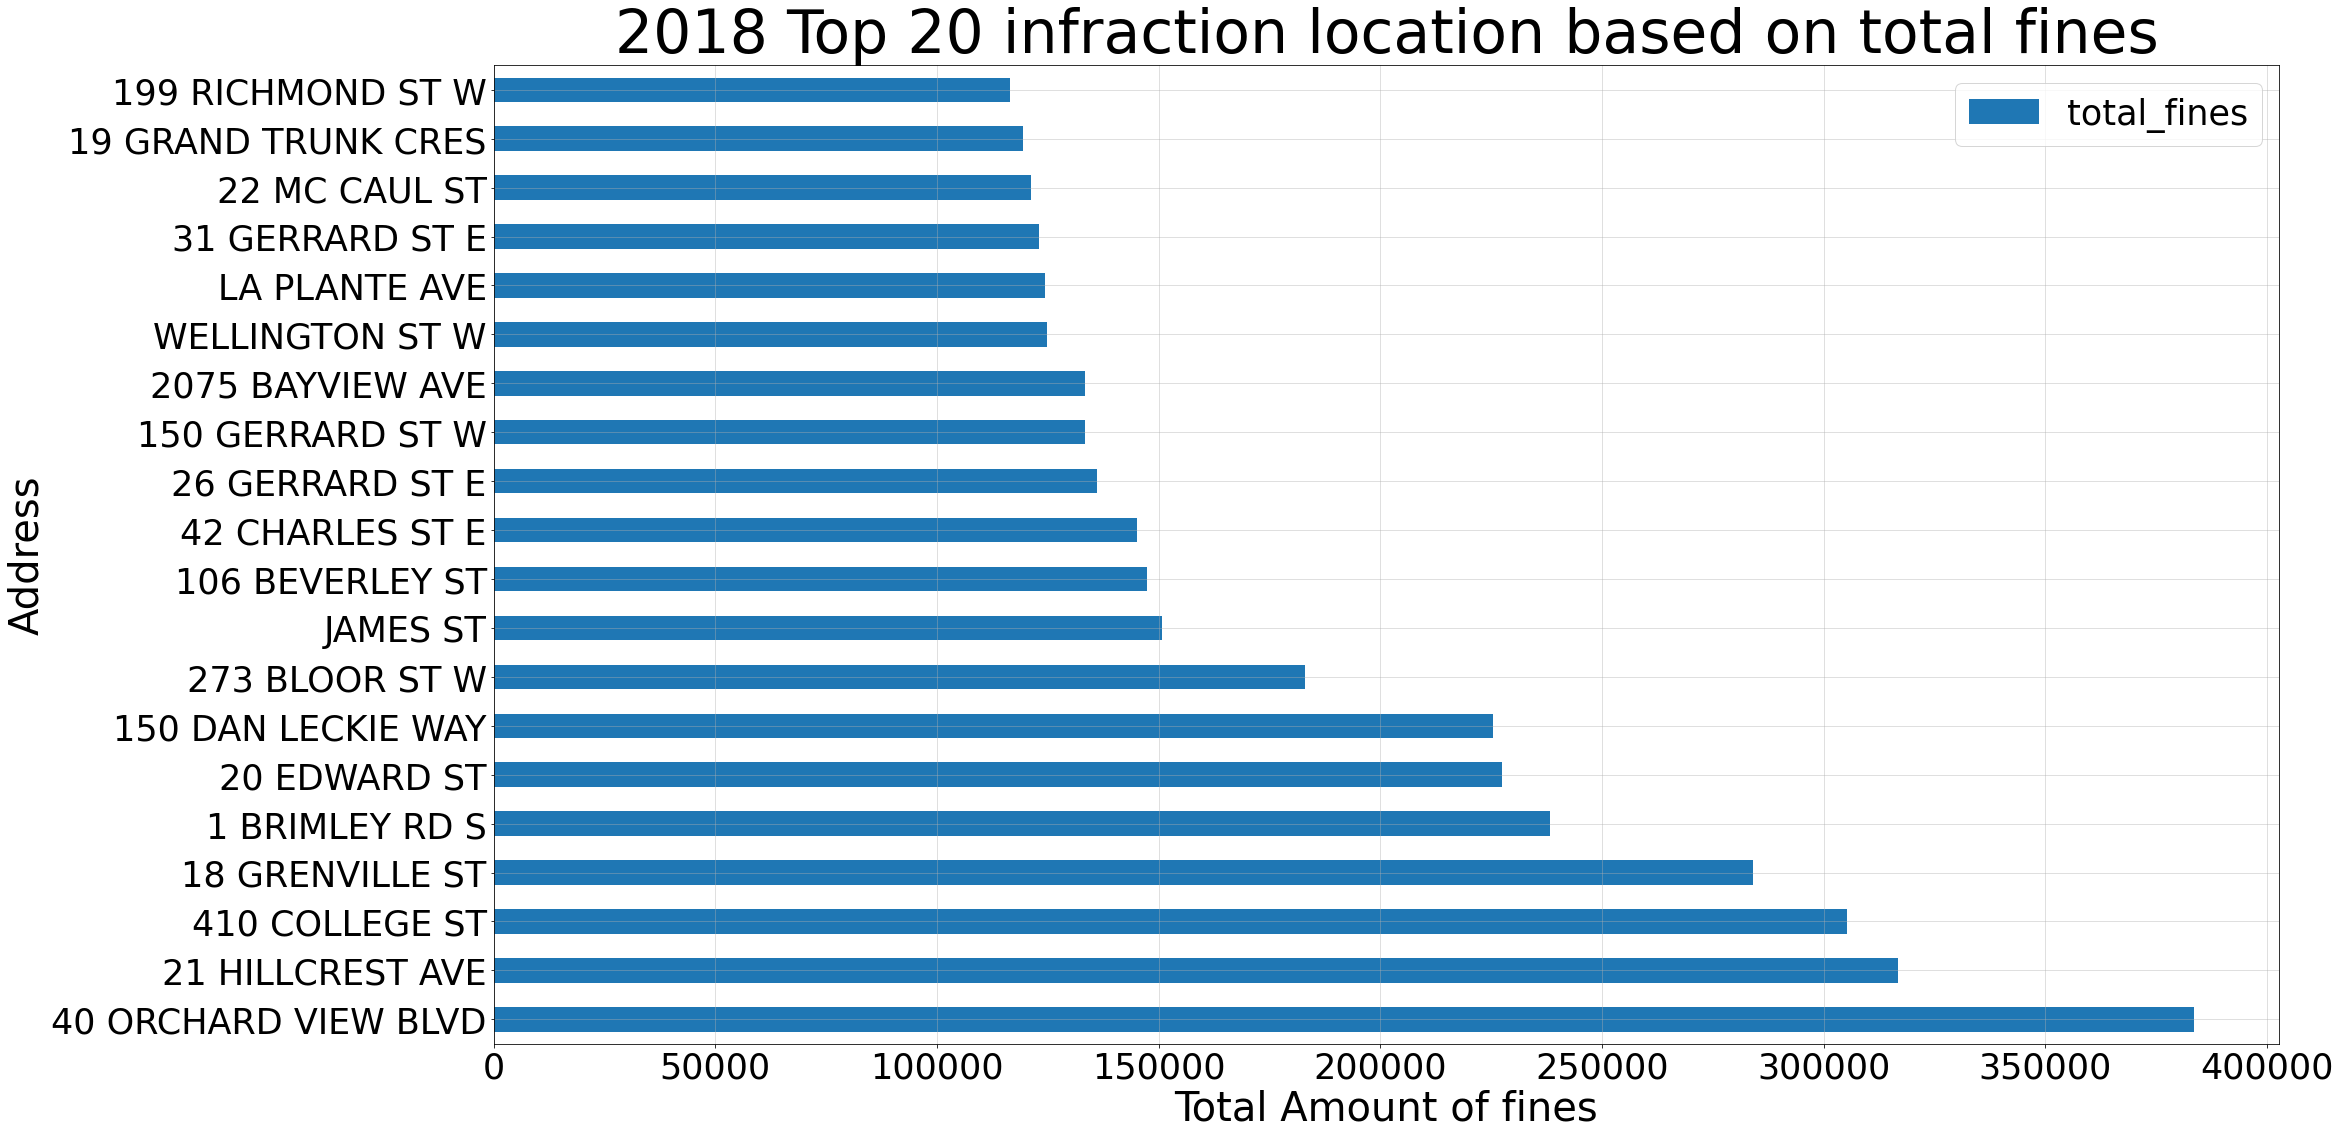

In [ ]:
#top 20 infraction locations based on fines collected 2018
top18_f=pd.DataFrame(parking_tags_data2018.groupby(['location2']).set_fine_amount.sum().sort_values(ascending=False).head(20).reset_index())
top18_f.rename(columns={'location2':'infraction_address','set_fine_amount':'total_fines'}, inplace=True)
top18_f.plot.barh(x='infraction_address',figsize=(32,18))
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(fontsize=35)
plt.xlabel('Total Amount of fines',fontsize=40)
plt.ylabel('Address',fontsize=40)
plt.title('2018 Top 20 infraction location based on total fines', fontsize=60)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()


40 Orchard View Blvd was the location that paid the most fines in 2018. This is the location of the Northern District Branch of the Toronto Public library.

In [ ]:
#top 20 infraction locations for 2018
top18il=pd.DataFrame(parking_tags_data2018.location2.value_counts().head(20).reset_index())
top18il.rename(columns={'index':'infraction_address','location2':'infraction_frequency'}, inplace=True)
top18il['infraction_address']=top18il['infraction_address'] + ' Toronto'

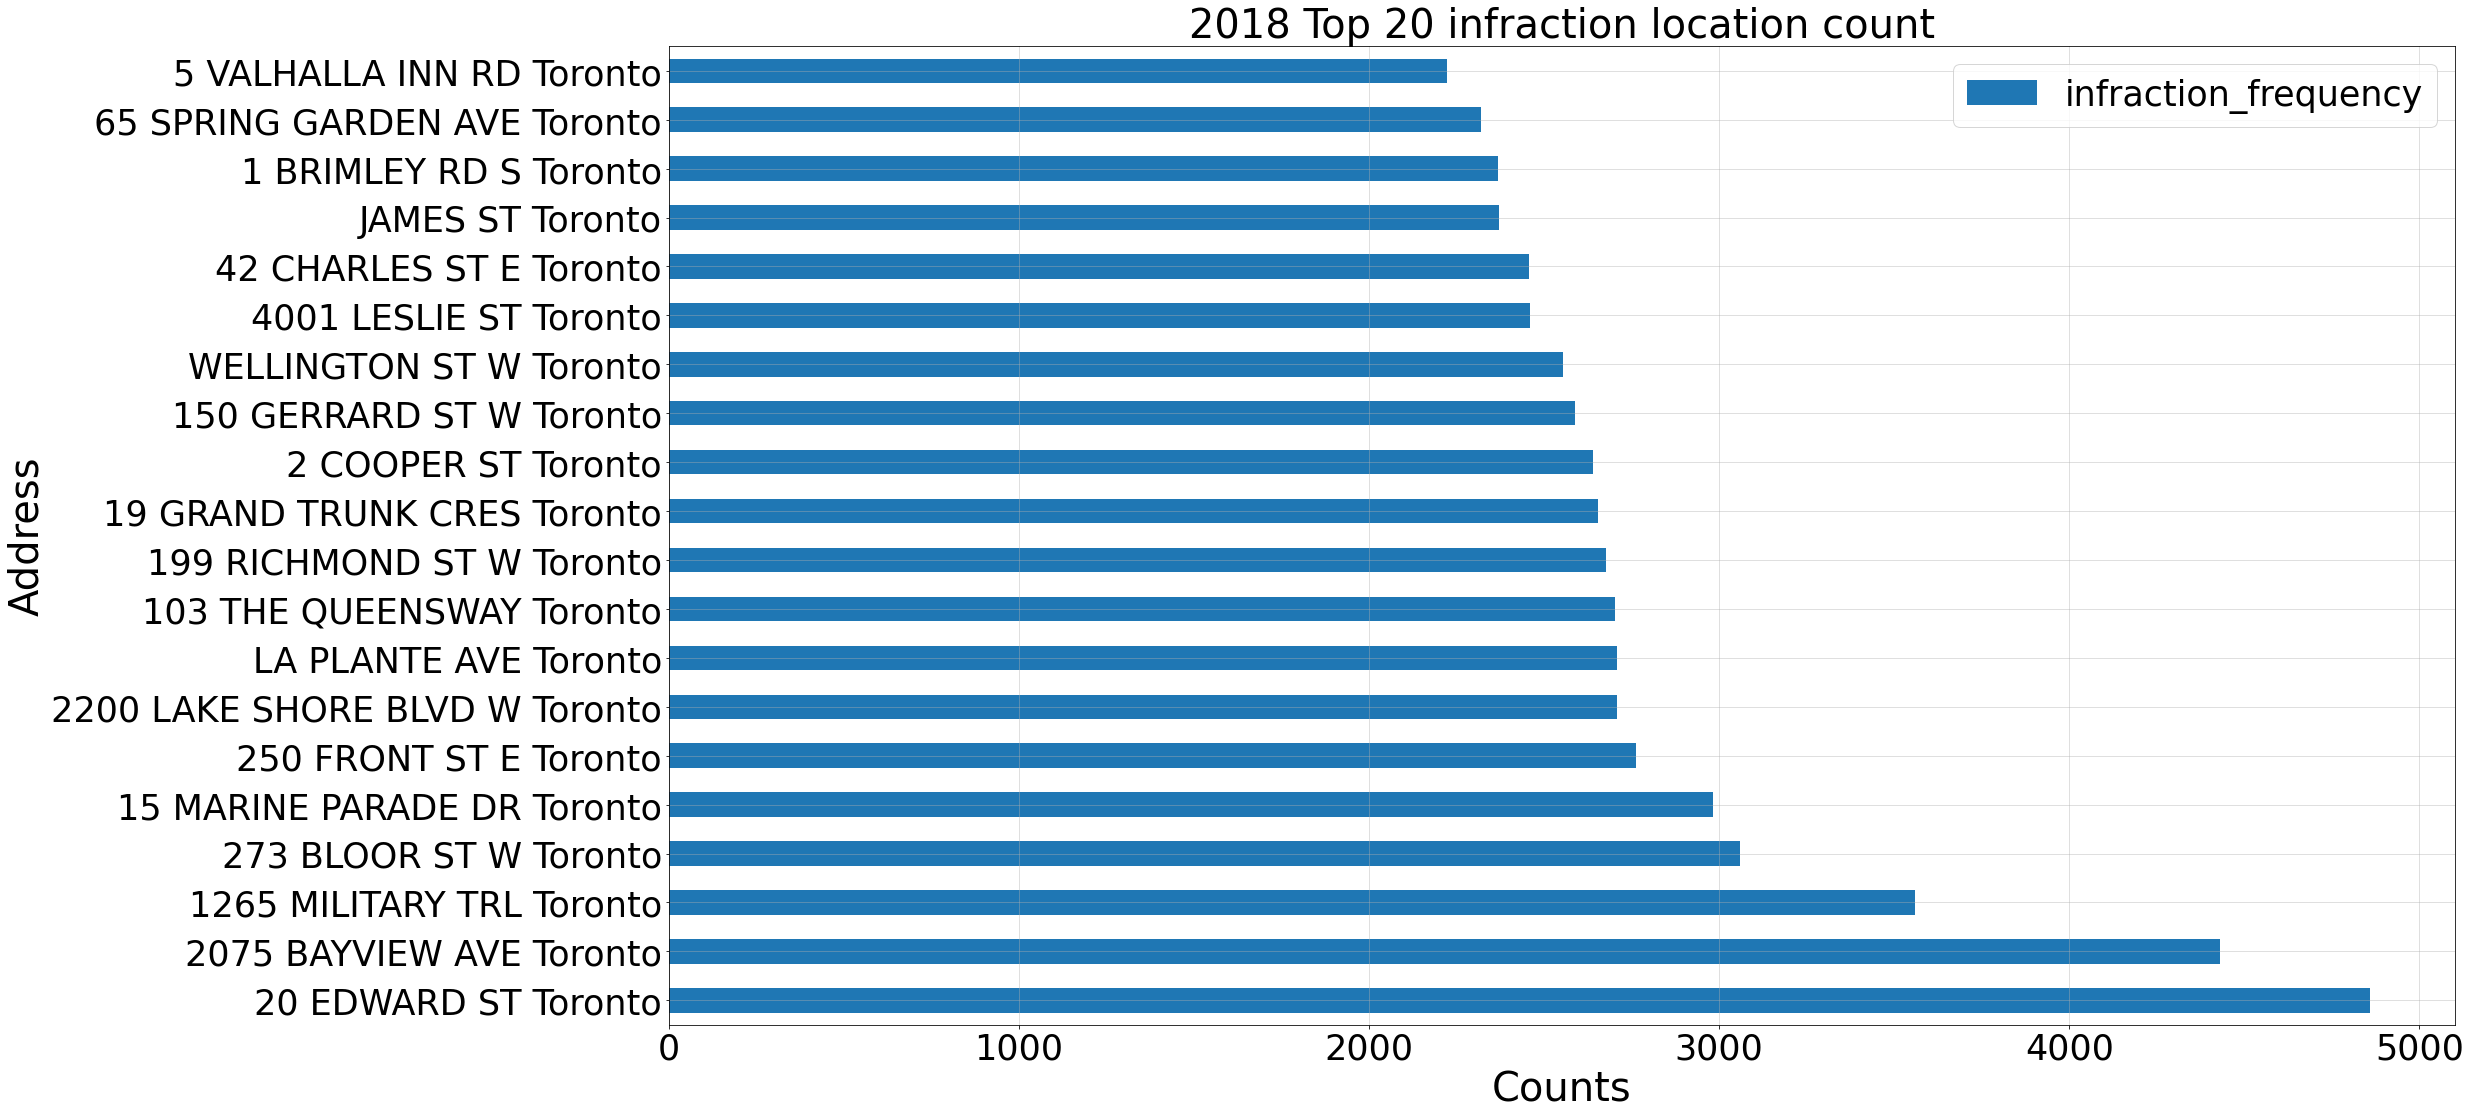

In [ ]:
top18il.plot.barh(x='infraction_address',figsize=(32,18))
plt.xlabel('Counts',fontsize=40)
plt.ylabel('Address',fontsize=40)
plt.title('2018 Top 20 infraction location count', fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(fontsize=35)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()

25 Edward street had the most infractions in 2018. This location is right in the core of downtown Toronto next to Yonge street.

In [ ]:
top18il['lat']=top18il['infraction_address'].apply(lambda lat: geocode(lat).latitude)
top18il['lng']=top18il['infraction_address'].apply(lambda lng: geocode(lng).longitude)

In [ ]:
#tacking on closest Green P Parking
top18il['address'] = top18il.apply(lambda row: find_nearest_greenP(row['lat'], row['lng']), axis=1)

In [ ]:
top18il=pd.merge(top18il,green_P_parking_df[['address','lat','lng']],on='address', how='left')

In [ ]:
top18il.rename(columns={'address':'closest_green_P_parking'}, inplace=True)
top18il['distance_to_greenP_in_km']=top18il.apply(lambda row: geodesic((row['lat_x'],row['lng_x']),(row['lat_y'],row['lng_y'])).km, axis=1)

In [ ]:
#tacking TTC stops info to dataframe
top18il['stop_name']=top18il.apply(lambda row: find_nearest_ttc(row['lat_x'], row['lng_x']), axis=1)

In [ ]:
top18il=pd.merge(top18il,ttc_stops[['stop_name','stop_lat','stop_lon']],on='stop_name', how='left')
top18il.rename(columns={'stop_name':'closest_ttc_stop'}, inplace=True)
top18il['distance_to_ttc_stop_in_km']=top18il.apply(lambda row: 
                                                    geodesic((row['lat_x'],row['lng_x']),(row['stop_lat'],row['stop_lon'])).km, axis=1)
#Table of 2018's top 20 infraction locations with their closest Green P Parking and TTC stop respectively
top18il

,infraction_address,infraction_frequency,lat_x,lng_x,closest_green_P_parking,lat_y,lng_y,distance_to_greenP_in_km,closest_ttc_stop,stop_lat,stop_lon,distance_to_ttc_stop_in_km
0,20 EDWARD ST Toronto,4858,43.656941,-79.382067,20 Dundas Square,43.656004,-79.379933,0.201211,Dundas Station - Northbound Platform,43.657149,-79.381188,0.074590
1,2075 BAYVIEW AVE Toronto,4431,43.721690,-79.376572,2170 Bayview avenue,43.723875,-79.379571,0.342520,Hospital Rd at Wellness Way East Side (Sunnybr...,43.721780,-79.376853,0.024720
2,2075 BAYVIEW AVE Toronto,4431,43.721690,-79.376572,2170 Bayview avenue,43.723875,-79.379571,0.342520,Hospital Rd at Wellness Way East Side (Sunnybr...,43.721820,-79.376728,0.019130
3,1265 MILITARY TRL Toronto,3560,43.783364,-79.187081,1530 Markham Road - minor capital repairs onsite,43.789507,-79.237915,4.148318,University of Toronto Scarborough,43.784510,-79.184841,0.220790
4,1265 MILITARY TRL Toronto,3560,43.783364,-79.187081,1530 Markham Road - minor capital repairs onsite,43.789507,-79.237915,4.148318,University of Toronto Scarborough,43.784391,-79.184989,0.203469
5,273 BLOOR ST W Toronto,3060,43.667931,-79.396255,9 Bedford Road,43.66895845653576,-79.39712002202072,0.133832,Bloor St West at Bedford Rd,43.667897,-79.397560,0.105350
6,15 MARINE PARADE DR Toronto,2983,43.629106,-79.475411,15 Marine Parade Drive,43.6267898,-79.4767453,0.279005,Marine Parade Dr (East) at Lake Shore Blvd West,43.629980,-79.476401,0.125741
7,250 FRONT ST E Toronto,2761,43.651606,-79.363848,271 Front Street East,43.651254,-79.362971,0.080822,Front St East at Berkeley St,43.651396,-79.363737,0.024975
8,250 FRONT ST E Toronto,2761,43.651606,-79.363848,271 Front Street East,43.651254,-79.362971,0.080822,Front St East at Berkeley St,43.651134,-79.364259,0.062044
9,2200 LAKE SHORE BLVD W Toronto,2709,43.622400,-79.482124,2225 Lake shore Blvd West (Parks),43.6200300180063,-79.48066664138639,0.288356,Lake Shore Blvd West at Park Lawn Rd West Side,43.622602,-79.481558,0.050892


In [ ]:
correct_top18il=top18il.iloc[[0,1,3,5,6,7,9,14,15,17,18,20,22,23,24,26,27,29,35,36]].reset_index().drop(['index'], axis=1)

In [ ]:
correct_top18il.to_csv('top_20_il_2018.csv', index=False)

In [ ]:
parking_tags_data2018['date_of_infraction']=pd.to_datetime(parking_tags_data2018['date_of_infraction'], format='%Y%m%d')
parking_tags_data2018['month']=parking_tags_data2018['date_of_infraction'].dt.month
parking_tags_data2018['day_of_week']=parking_tags_data2018['date_of_infraction'].dt.weekday
parking_tags_data2018['season']=parking_tags_data2018['month'].apply(lambda x:x%12 // 3 + 1 )

In [ ]:
daily=parking_tags_data2018.groupby(parking_tags_data2018.date_of_infraction)['tag_number_masked'].count().reset_index().rename(
    columns={'date_of_infraction': 'Date','tag_number_masked':'Counts'})
px.line(daily,x='Date', y='Counts', title='2018 Daily Infractions Count')


In [ ]:
# 0=Monday
# 1=Tuesday
# 2=Wednesday
# 3=Thursday
# 4=Friday
# 5=Saturday
# 6=Sunday
#
day_of_week=parking_tags_data2018.groupby(parking_tags_data2018.day_of_week)['tag_number_masked'].count().reset_index().rename(
    columns={'day_of_week': 'Day of Week','tag_number_masked':'Counts'})
px.line(day_of_week, x='Day of Week', y='Counts', title='2018 Day of Week Infractions Count')


Tuesdays-Thursdays are the days were most parking infractions were issued in 2018.

In [ ]:
monthly=parking_tags_data2018.groupby(parking_tags_data2018.month)['tag_number_masked'].count().reset_index().rename(
    columns={'month': 'Month','tag_number_masked':'Counts'})
px.line(monthly, x='Month', y='Counts', title='2018 Monthly Infractions Count')


October is the month where most parking infractions were issued followed by March in 2018.

In [ ]:
# 1=Winter
# 2=Spring
# 3=Summer
# 4=Fall
season=parking_tags_data2018.groupby(parking_tags_data2018.season)['tag_number_masked'].count().reset_index().rename(
    columns={'season': 'Season','tag_number_masked':'Counts'})
px.line(season, x='Season', y='Counts', title='2018 Seasonal Infraction Count')


Autumn is the season where most parking tickets were issued followed by Spring in 2018.

##2018 Map of Top 20 Infraction locations

Click on the follwing link:

[2018 Map of Top 20 Infraction locations](https://www.google.com/maps/d/edit?mid=181jNTZNTCtPaWzUI4Nd_vCVqQjatisRQ&usp=sharing)

Text(0.5, 1.0, 'City of Toronto Wards')

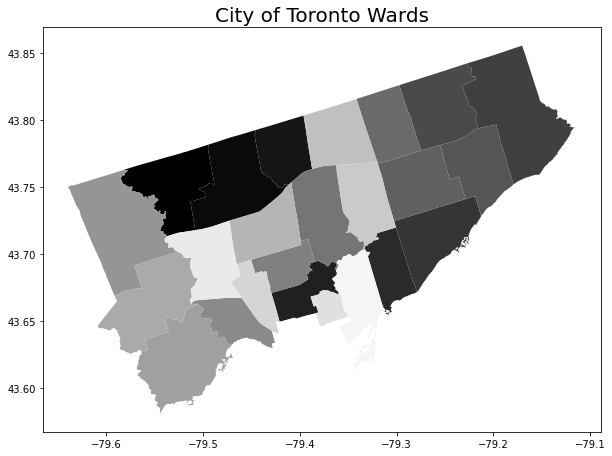

In [16]:
gpd.read_file('/content/City Wards Data.shp').plot(cmap='gray', figsize=(10,10))
plt.title('City of Toronto Wards', fontsize=20)